<center>
<h1>Earthquake &  Data Analysis of Morocco</h1>
<hr>
</center>

<h2>Description & Discussion of the Background</h2>
<b>Morocco</b>, located in North Africa, is a country that is not only known for its rich history, diverse culture, and breathtaking landscapes but also for its position on the geologically active plate boundaries, making it susceptible to earthquakes.

### Geographical and Geographical Context:
Morocco is bordered by the Atlantic Ocean to the west, the Mediterranean Sea to the north, Algeria to the east and southeast, and Western Sahara to the south. This strategic location places Morocco at the intersection of the African and Eurasian tectonic plates. As these plates move, they generate stress along the faults, which can cause earthquakes.

### Population:
Morocco has a population of approximately 37 million inhabitants. Given the concentration of its populace in urban regions like Casablanca, Rabat, Marrakech, and Fez, the potential impact of a major earthquake could be significant in terms of loss of human life and damage to infrastructure.

### Historical Earthquake Incidents:
Over the years, Morocco has experienced several devastating earthquakes. One of the most catastrophic was the Agadir earthquake in 1960, which resulted in the death of about 15,000 people and left the city in ruins. Such events highlight the urgent need for earthquake preparedness and resilient infrastructural development.

### Earthquake Zones: 
The northern region of Morocco, especially the Rif mountain range, is the most seismically active. However, other areas, including the Atlas Mountains, are not exempt from seismic activities. The varying earthquake risks across regions necessitate differential approaches to construction standards, disaster preparedness, and public awareness campaigns.

### Challenges & Concerns:
Due to rapid urbanization, many areas in Morocco have seen significant construction booms. Ensuring that these constructions are earthquake-resistant is crucial. Another challenge is the need to retrofit older buildings that might not be up to the current seismic standards. Public awareness and education are also paramount to ensure that residents know what to do before, during, and after an earthquake.




### Issue

Analyzing earthquake data alongside the popular landmarks in various cities is invaluable for both investors and general citizens. For investors, this information aids in identifying safer regions for project developments and investing in businesses that are less concentrated in high-risk areas. On the other hand, the average citizen might be looking for safer residence locations that are concurrently near essential social facilities. Thus, by employing a cluster analysis using historical earthquake data spanning a significant period (like the past century) for each city, we can pinpoint areas with minimal to high earthquake susceptibility. Additionally, evaluating popular spots in these locales can help discern the unique characteristics of each region.

## Data
### Data Sources
The data sources used in this study to solve the problem are as follows:
<ul>
<li>From the Usgs Earthquake live page, the statistics of the earthquakes that occurred between 1960-2023 and whose magnitudes were between 2.9-10 according to the Richter scale were taken in csv format with various filtering methods.</li>
<li> With OpenStreetMap, the GeoJSON data needed for earthquake distribution and maps showing clustered groups was provided.</li>
<li>With the Foursquare API, the type information of the most popular venues of the cities,
the latitude and longitude information of those places were obtained.</li>
</ul>

## Methodology

Let's create the first data frame with earthquake statistics from USGS. As a database, I used the GitHub repository in my study.

In [12]:
# Importing required libs.
import numpy as np
import pandas as pd

# Options for view.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Earthquake Data.
eq_data = pd.read_csv("/Users/ymadigital/Downloads/earthquake_ma.csv")
eq_data.head(10)

Eq_Latitude  Eq_Longitude   Depth  Magnitude             City
0      31.0451       -8.4611  10.000        4.2           Agadir
1      30.9061       -8.4769  10.000        4.9           Agadir
2      31.0643       -8.3907  25.978        6.8           Agadir
3      35.0303       -3.9547  15.028        4.5           Agadir
4      35.0177       -3.8262  10.000        4.4            Ahfir
5      35.0455       -3.8846  10.000        4.1  Aïn Beni Mathar
6      34.9885       -3.8382  10.000        4.4         Aïn Leuh
7      34.9950       -3.9009  10.000        4.9        Al Aaroui
8      30.3325       -9.5904  10.000        4.1        Al Aaroui
9      35.5367       -3.4806  10.000        4.4        Al Aaroui

According to the data set obtained, it can be seen by looking at the __Magnitude Histogram
Chart__ that the majority of the earthquakes that occurred were between 3,29 and 3,68 in magnitude.
The histogram graph is informative about the distribution of earthquakes and is useful for
getting to know the structure of the data set.

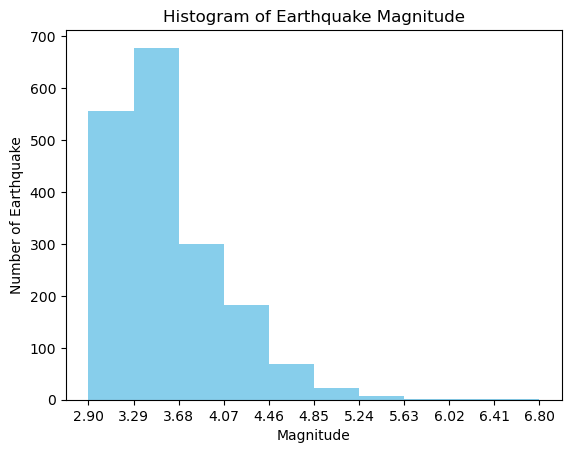

In [14]:
# Matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

# Magnitude Histogram Chart
count, bin_edges = np.histogram(eq_data['Magnitude'])
eq_data['Magnitude'].plot(kind='hist', xticks=bin_edges, color="skyblue")
plt.title('Histogram of Earthquake Magnitude')
plt.ylabel('Number of Earthquake') 
plt.xlabel('Magnitude') 
plt.show()

In addition, the standard deviation, minimum and maximum values of the data set in the study
were examined and an opinion was obtained. The table for this review is shown below.

In [3]:
# Exploring Earthquake Data.
eq_data.describe()

Eq_Latitude  Eq_Longitude        Depth    Magnitude
count  1821.000000   1821.000000  1821.000000  1821.000000
mean     34.972421     -4.082575     7.788669     3.547249
std       0.804831      1.087892    14.272862     0.507018
min      28.695000    -12.046000     0.000000     2.900000
25%      34.985000     -4.073000     0.000000     3.200000
50%      35.143000     -3.954000     0.000000     3.400000
75%      35.275000     -3.765000    10.000000     3.800000
max      35.941000     -1.356000   133.800000     6.800000

The Magnitude standard deviation value of __~0.50__ shows that Magnitude
values are in a more uniform distribution and close to each other than other variables.
Magnitude Histogram Chart in Figure 5 also supports this idea. The __Depth Histogram Chart__
below, which shows the distribution of Depth values, can also be examined.

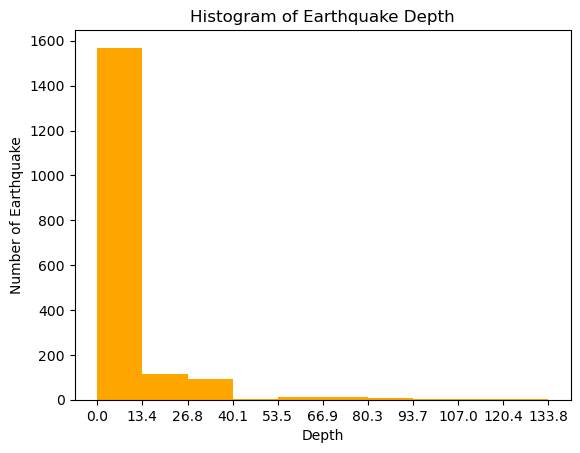

In [4]:
# Depth Histogram Chart
count, bin_edges = np.histogram(eq_data['Depth'])
eq_data['Depth'].plot(kind='hist', xticks=bin_edges, color="orange")
plt.title('Histogram of Earthquake Depth')
plt.ylabel('Number of Earthquake') 
plt.xlabel('Depth') 
plt.show()

In [5]:
# GeoPy lib for coordinates and addresses.
!pip install geopy
from geopy.geocoders import Nominatim

# Getting Morrocco's Geographical Coordinates.
try:
    location = Nominatim(user_agent="ibm_capstone_project").geocode('Morocco, MA')
    tr_lat = location.latitude
    tr_lon = location.longitude
    print('The geograpical coordinate Central of Morocco: {}, {}'.format(tr_lat, tr_lon))
    
except Exception as e:
    print(e)

The geograpical coordinate Central of Morocco: 31.1728205, -7.3362482


In [6]:
# For showing progress bar.
def prgrss(sequence, every=None, size=None, name='Loading'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [7]:
morocco_data = eq_data[
    (eq_data['Eq_Latitude'] >= 21) & 
    (eq_data['Eq_Latitude'] <= 36) & 
    (eq_data['Eq_Longitude'] >= -17) & 
    (eq_data['Eq_Longitude'] <= -1)
]
# Checking the number of rows after filtering
morocco_data.shape

(1821, 5)

In [8]:
# Folium library for showing earthquake map.
import folium

morocco_lat, morocco_lon = 31.7917, -7.0926  # Roughly center of Morocco
zoom_start = 6
eq_map = folium.Map(location=[morocco_lat, morocco_lon], zoom_start=zoom_start) 

for c, lt, ln, m, d in zip(morocco_data['City'], 
                           morocco_data['Eq_Latitude'], 
                           morocco_data['Eq_Longitude'], 
                           morocco_data['Magnitude'], 
                           morocco_data['Depth']):
    folium.CircleMarker([lt, ln], radius=1, color='blue',
        popup='City:{}, Magnitude:{}, Depth:{}'.format(c, m, d),
        fill=True, fill_color='blue', fill_opacity=1
    ).add_to(eq_map)
    
eq_map


In [9]:
morocco_data = eq_data[
    (eq_data['Eq_Latitude'] >= 21) & 
    (eq_data['Eq_Latitude'] <= 36) & 
    (eq_data['Eq_Longitude'] >= -17) & 
    (eq_data['Eq_Longitude'] <= -1)
]

# Check how many rows we have after filtering
print(morocco_data.shape)


(1821, 5)


In [11]:
map_bounds = [[21, -17], [36, -1]]
eq_map = folium.Map(bounds=map_bounds, zoom_start=zoom_start)


In [12]:
morocco_data = morocco_data.dropna(subset=['Eq_Latitude', 'Eq_Longitude', 'City', 'Magnitude', 'Depth'])


### Latitude & Longitude for each city from Google.

In [13]:
# Latitude & Longitude for each city from Wikipedia.
eq_cities = pd.read_csv("/Users/ymadigital/Downloads/neighborhoods_ma.csv")
eq_cities.head(7)

City  Latitude  Longitude
0            Casablanca   33.5333    -7.5833
1  El Kelaa des Srarhna   32.0481    -7.4083
2                   Fès   34.0433    -5.0033
3               Tangier   35.7767    -5.8039
4             Marrakech   31.6300    -8.0089
5                  Sale   34.0333    -6.8000
6              Mediouna   33.4500    -7.5100

In [94]:
print("Duplicates in eq_cities:", eq_cities['City'].duplicated().sum())
print("Duplicates in df_mean:", df_mean.index.duplicated().sum())
print("Duplicates in df_max:", df_max.index.duplicated().sum())
print("Duplicates in df_min:", df_min.index.duplicated().sum())

Duplicates in eq_cities: 0
Duplicates in df_mean: 0
Duplicates in df_max: 0
Duplicates in df_min: 0


In [15]:
duplicated_cities = eq_cities[eq_cities['City'].duplicated(keep=False)]
print(duplicated_cities)

Empty DataFrame
Columns: [City, Latitude, Longitude]
Index: []


In [16]:
eq_cities.drop_duplicates(subset='City', keep='first', inplace=True)

### Feature Extraction

The average, maximum and minimum features for each city were generated by feature
extraction. These attributes were added to the first data set edited. The new attributes are derived
based on the Magnitude and Depth variables. The _Eq_Latitude_ and _Eq_Longitude_ attributes
were then removed from the data set. 

Finally, the Master data set was created with the addition
of the data table with the latitude and longitude information of __109 cities__ to the data set.

In [17]:


# Feature Extraction
df_mean = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').mean()
df_mean.rename(columns={'Magnitude':'Avg Magnitude', 'Depth':'Avg Depth'}, inplace=True)

df_max = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').max()
df_max.rename(columns={'Magnitude':'Max Magnitude', 'Depth':'Max Depth'}, inplace=True)

df_min = eq_data.drop(['Eq_Latitude','Eq_Longitude'], axis=1).groupby('City').min()
df_min.rename(columns={'Magnitude':'Min Magnitude', 'Depth':'Min Depth'}, inplace=True)

# Concatenating and dropping some dataframes with mean values.
df = pd.concat([eq_cities.set_index("City"), df_mean, df_max, df_min], axis=1)

# The places without earthquake record (Magnitude > 4.0) for 100 years
# There are 4 cities: Kırklareli, Rize, Bartın, Kilis.
# So we must support these missing values with reasonable values.
df['Avg Magnitude'].fillna(value=2.5, inplace=True)

# If these cities have not had earthquakes over 4.0 for 100 years, 
# the Max_Magnitude cannot exceed 4.0.
df['Max Magnitude'].fillna(value=3.0, inplace=True)

# The fact that there is no earthquake record greater than 4.0 for these cities in the statistics for
# 100 years does not mean that there is no earthquake.  
df['Min Magnitude'].fillna(value=1.0, inplace=True)

# However, some Depth values were found to be 0.0 in the statistics obtained from AFAD.
# Considering that this situation may be natural, the values of Max Depth and Min Depth to be
# derived below are accepted as 0.0 for these provinces. 
df['Min Depth'].fillna(value=0.0, inplace=True)
df['Max Depth'].fillna(value=0.0, inplace=True)
df['Avg Depth'].fillna(value=0.0, inplace=True)

# Reset index
df.reset_index(inplace=True)
df = df.rename(columns={'index':'City'})

# Master Data
df.head(10)

City  Latitude  Longitude  Avg Depth  Avg Magnitude  \
0            Casablanca   33.5333    -7.5833        0.0           3.75   
1  El Kelaa des Srarhna   32.0481    -7.4083        0.0           2.50   
2                   Fès   34.0433    -5.0033        0.0           3.42   
3               Tangier   35.7767    -5.8039        1.6           3.65   
4             Marrakech   31.6300    -8.0089        0.0           2.50   
5                  Sale   34.0333    -6.8000        0.0           2.50   
6              Mediouna   33.4500    -7.5100        0.0           2.50   
7                 Rabat   34.0209    -6.8416        0.0           2.50   
8                Meknès   33.8950    -5.5547        0.0           3.00   
9           Oujda-Angad   34.6867    -1.9114        0.0           2.50   

   Max Depth  Max Magnitude  Min Depth  Min Magnitude  
0        0.0            4.0        0.0            3.5  
1        0.0            3.0        0.0            1.0  
2        0.0            3.9        0.0            3.1  
3        1.6            3.7        1.6            3.6  
4        0.0            3.0        0.0            1.0  
5        0.0            3.0        0.0            1.0  
6        0.0            3.0        0.0            1.0  
7        0.0            3.0        0.0            1.0  
8        0.0            3.0        0.0            3.0  
9        0.0            3.0        0.0            1.0

In [18]:
# Foursquare Credentials
# Foursquare API Credentials
CLIENT_ID = '' 
CLIENT_SECRET = ''
VERSION = '20230912' # today's date in 'YYYYMMDD' format for versioning
RADIUS = 100 # 5 km around the city
LIMIT = 100 # limit of number of venues returned by Foursquare API



In [19]:
import requests
import pandas as pd

def getCityVenues(names, latitudes, longitudes):
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # Construct the API request URL
        url = 'https://api.foursquare.com/v3/places/search?&client_id={}&client_secret={}&v={}&ll=31.7917,7.0926,{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, RADIUS, LIMIT)
        
        try:
            # Make the GET request
            response = requests.get(url)
            
            # Check for successful response
            if response.status_code == 200:
                data = response.json()
                
                # Check if 'groups' key exists
                groups = data.get('response', {}).get('groups', [])
                if groups:
                    results = groups[0].get('items', [])
                    
                    # Extract venue and category information
                    venues_list.extend([(name, v['venue']['name'], v['venue']['categories'][0]['name']) for v in results])
                else:
                    print(f"No 'groups' data found for {name}.")
            else:
                print(f"Received a {response.status_code} response from the API for {name}.")
                print(response.text)  # Print the API response for debugging

        except Exception as e:
            print(f"Error fetching data for {name}. Error: {e}")

    if venues_list:
        nearby_venues = pd.DataFrame(venues_list, columns=['City', 'Venue', 'Venue Category'])
        return nearby_venues
    else:
        print("No venues data found.")
        return pd.DataFrame(columns=['City', 'Venue', 'Venue Category'])

print(response.text)


NameError: name 'response' is not defined

In [24]:
results = requests.get(url).json()
results

{'meta': {'code': 410,
  'errorType': 'deprecated',
  'errorDetail': 'Usage of the V2 Places API has been deprecated for new Projects. Please see our updated documentation for V3 for more details: https://docs.foursquare.com/reference',
  'requestId': '6503282beb87256aed20850d'},
 'response': {}}

In [ ]:
from pandas import json_normalize
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

In [ ]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered
file_name = 'Oukaimeden-venus.csv'
dataframe_filtered.to_csv(file_name, index=False)
print(f"Data saved to {file_name}")

Foursquare API was used to discover popular venues in cities. As a limit for each city, 100
popular venues and __5 kilometers in diameter__ were measured. In some cities, it has been
observed that when the diameter measure is shorter, no popular space data is returned. For this
reason, a 20-kilometer-wide search was conducted in order to obtain at least 10 rows from each
city. A total of __2559 rows of data were obtained__.

In [25]:
# City Venues data from the Foursquare API.
city_venues = pd.read_csv("/Users/ymadigital/Downloads/foursquare_data.csv")

print(city_venues.shape)
city_venues.head(9)

(2559, 3)


City                     Venue        Venue Category
0  Casablanca         Kenzi Basma Hotel                 Hotel
1  Casablanca   Agence Voyage Ami Tours                Office
2  Casablanca   Place des Nations Unies                 Plaza
3  Casablanca  Hyatt Regency Casablanca                 Hotel
4  Casablanca                   Cartier         Jewelry Store
5  Casablanca    Le Cuisto Traditionnel   Moroccan Restaurant
6  Casablanca            Centre Eclipse       Coworking Space
7  Casablanca            Cafe Amsterdam                  Café
8  Casablanca                 EuroSnack  Fast Food Restaurant

### Summary of City Count table

A summary table was created for the popular places identified in the cities. The pivot table
shows the total number of venues returned by the Foursquare API for each city. The chart of
this table is as follows.

In [26]:
# Total number of Venue in each City
summary = city_venues.drop('Venue Category', axis=1).groupby('City').count().reset_index() 
summary = summary.rename(columns={'Venue':'Count'})
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head(10)

City  Count
0       Bni Abdallah      1
1              Rabat      1
2            Tétouan      2
3              Ahfir      3
4           Targuist      3
5  Mechraa Bel Ksiri      4
6             Mnabha      6
7          Aïn Leuh      7
8        Bni Boufrah      7
9           Aïn Leuh      7

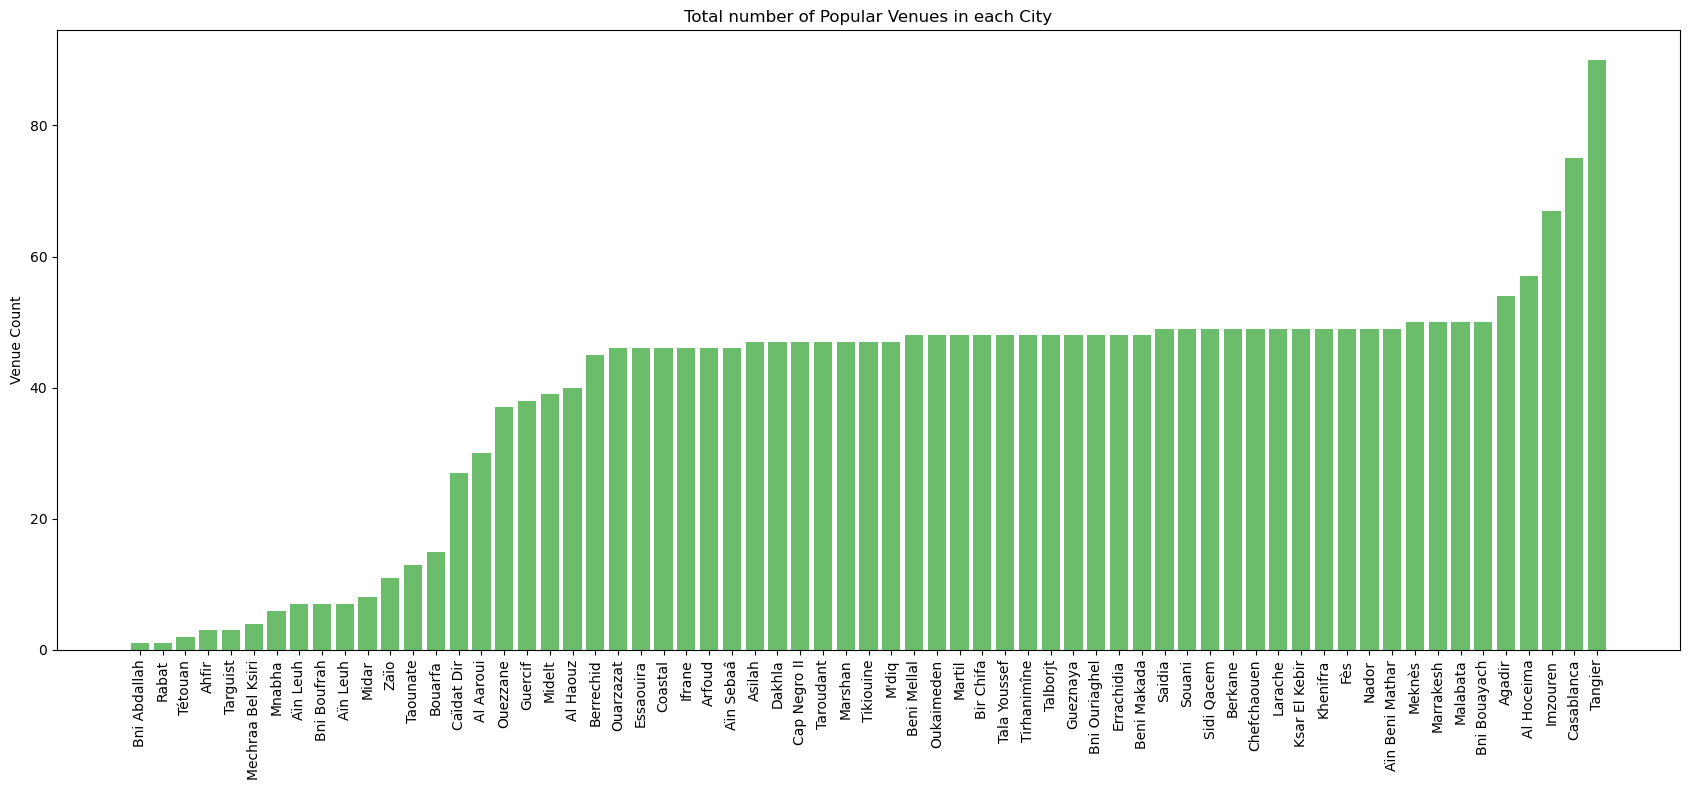

In [27]:
# Redefining the necessary variables for plotting
objects = summary['City']
y_pos = np.arange(len(objects))
performance = summary['Count']

# Plotting the bar chart for the summary dataframe
plt.figure(figsize=(17, 8))
plt.bar(y_pos, performance, align='center', alpha=0.7, color="tab:green")
plt.xticks(y_pos, objects)
plt.ylabel('Venue Count')
plt.title('Total number of Popular Venues in each City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

When the data obtained with the Foursquare API was summarized, it was seen that a total of
__331 types of popular venues__ belonging to different categories were identified. A new data table
has been created showing __the 10 most common venues__ in each province.

In [28]:
# one hot encoding
city_onehot = pd.get_dummies(city_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
city_onehot['City'] = city_venues['City'] 

# move city column to the first column
fixed_columns = [city_onehot.columns[-1]] + list(city_onehot.columns[:-1])
city_onehot = city_onehot[fixed_columns]

#  347 popular venues in different categories were found.
city_grouped = city_onehot.groupby('City').mean().reset_index()

print(city_grouped.shape)
city_grouped.head(11)

(65, 332)


City  Advertising Agency  Afghan Restaurant  \
0             Agadir            0.000000                0.0   
1              Ahfir            0.000000                0.0   
2   Aïn Beni Mathar            0.000000                0.0   
3          Aïn Leuh            0.000000                0.0   
4        Aïn Sebaâ            0.000000                0.0   
5          Al Aaroui            0.000000                0.0   
6           Al Haouz            0.000000                0.0   
7         Al Hoceima            0.017544                0.0   
8             Arfoud            0.000000                0.0   
9             Asilah            0.000000                0.0   
10          Aïn Leuh            0.000000                0.0   

    African Restaurant   Airport  Airport Gate  Airport Terminal  \
0             0.000000  0.000000           0.0               0.0   
1             0.000000  0.000000           0.0               0.0   
2             0.000000  0.000000           0.0               0.0   
3             0.000000  0.000000           0.0               0.0   
4             0.000000  0.000000           0.0               0.0   
5             0.033333  0.033333           0.0               0.0   
6             0.000000  0.000000           0.0               0.0   
7             0.000000  0.000000           0.0               0.0   
8             0.021739  0.000000           0.0               0.0   
9             0.000000  0.000000           0.0               0.0   
10            0.000000  0.000000           0.0               0.0   

    Amphitheater  Antique Store  Apartment or Condo  Arcade  Art Gallery  \
0            0.0            0.0            0.000000     0.0     0.000000   
1            0.0            0.0            0.000000     0.0     0.000000   
2            0.0            0.0            0.040816     0.0     0.020408   
3            0.0            0.0            0.000000     0.0     0.000000   
4            0.0            0.0            0.021739     0.0     0.000000   
5            0.0            0.0            0.066667     0.0     0.000000   
6            0.0            0.0            0.025000     0.0     0.000000   
7            0.0            0.0            0.000000     0.0     0.000000   
8            0.0            0.0            0.000000     0.0     0.021739   
9            0.0            0.0            0.021277     0.0     0.042553   
10           0.0            0.0            0.000000     0.0     0.000000   

    Art Museum  Art Studio  Arts and Crafts Store  Arts and Entertainment  \
0     0.000000         0.0                    0.0                     0.0   
1     0.000000         0.0                    0.0                     0.0   
2     0.000000         0.0                    0.0                     0.0   
3     0.000000         0.0                    0.0                     0.0   
4     0.000000         0.0                    0.0                     0.0   
5     0.000000         0.0                    0.0                     0.0   
6     0.000000         0.0                    0.0                     0.0   
7     0.000000         0.0                    0.0                     0.0   
8     0.021739         0.0                    0.0                     0.0   
9     0.000000         0.0                    0.0                     0.0   
10    0.000000         0.0                    0.0                     0.0   

    Asian Restaurant  Assisted Living  Attraction  Auditorium  \
0                0.0         0.000000         0.0         0.0   
1                0.0         0.000000         0.0         0.0   
2                0.0         0.000000         0.0         0.0   
3                0.0         0.000000         0.0         0.0   
4                0.0         0.000000         0.0         0.0   
5                0.0         0.066667         0.0         0.0   
6                0.0         0.000000         0.0         0.0   
7                0.0         0.000000         0.0         0.0   
8                0.

In [29]:
# Most Common Venues of Each City
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = city_grouped['City']

for ind in np.arange(city_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head(11)

City 1st Most Common Venue 2nd Most Common Venue  \
0             Agadir       Coworking Space                  Café   
1              Ahfir   Housing Development         Swimming Pool   
2   Aïn Beni Mathar                  Café           Coffee Shop   
3          Aïn Leuh   Housing Development           Post Office   
4        Aïn Sebaâ              Hospital               Dentist   
5          Al Aaroui                  Café       Assisted Living   
6           Al Haouz                 Hotel              Mountain   
7         Al Hoceima                  Café                 Hotel   
8             Arfoud                 Hotel   Moroccan Restaurant   
9             Asilah   Moroccan Restaurant                 Hotel   
10          Aïn Leuh   Housing Development           Post Office   

          3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Automotive Repair Shop        Hardware Store          Tech Startup   
1                    Restaurant            Nail Salon        Nursery School   
2                      Pizzeria                Mosque            Hair Salon   
3                      Wine Bar                  Park              Mountain   
4                    University       Doctor's Office     College Classroom   
5            Apartment or Condo                  Bank   Housing Development   
6           Moroccan Restaurant       Cosmetics Store            Restaurant   
7                         Beach  Fast Food Restaurant           Coffee Shop   
8          Other Great Outdoors   Miscellaneous Store        Science Museum   
9   Historic and Protected Site                 Beach                  Café   
10                     Wine Bar                  Park              Mountain   

   6th Most Common Venue    7th Most Common Venue      8th Most Common Venue  \
0                 Office                     Bank            Doctor's Office   
1                 Notary  Non-Profit Organization                 Night Club   
2            Beer Garden       Apartment or Condo                   Pharmacy   
3                   Lake                    River    New American Restaurant   
4                 Office             Trade School        Housing Development   
5              Structure      Moroccan Restaurant   Furniture and Home Store   
6             Club House        Bed and Breakfast             Medical Center   
7                  Plaza            Boat or Ferry                  Structure   
8                   Café             Fuel Station  Fruit and Vegetable Store   
9            Coffee Shop              Art Gallery                       Bank   
10                  Lake                    River    New American Restaurant   

   9th Most Common Venue   10th Most Common Venue  
0    Moroccan Restaurant           Soccer Stadium  
1              Newsstand  New American Restaurant  
2           Tech Startup    College Arts Building  
3         Nursery School                   Notary  
4                 Mosque           Hardware Store  
5   Fast Food Restaurant              Coffee Shop  
6              Gastropub              Observatory  
7             Hair Salon                     Bank  
8          Military Base           Souvenir Store  
9      Bed and Breakfast                 Monument  
10        Nursery School                   Notary

In [30]:
# Aggregating all useful features for clustering.
data = pd.concat([df.drop(columns=['City']), city_grouped.drop(columns=['City'])], axis=1)
print(data.shape)
data.head(10)

(149, 339)


Latitude  Longitude  Avg Depth  Avg Magnitude  Max Depth  Max Magnitude  \
0   33.5333    -7.5833        0.0           3.75        0.0            4.0   
1   32.0481    -7.4083        0.0           2.50        0.0            3.0   
2   34.0433    -5.0033        0.0           3.42        0.0            3.9   
3   35.7767    -5.8039        1.6           3.65        1.6            3.7   
4   31.6300    -8.0089        0.0           2.50        0.0            3.0   
5   34.0333    -6.8000        0.0           2.50        0.0            3.0   
6   33.4500    -7.5100        0.0           2.50        0.0            3.0   
7   34.0209    -6.8416        0.0           2.50        0.0            3.0   
8   33.8950    -5.5547        0.0           3.00        0.0            3.0   
9   34.6867    -1.9114        0.0           2.50        0.0            3.0   

   Min Depth  Min Magnitude  Advertising Agency  Afghan Restaurant  \
0        0.0            3.5            0.000000                0.0   
1        0.0            1.0            0.000000                0.0   
2        0.0            3.1            0.000000                0.0   
3        1.6            3.6            0.000000                0.0   
4        0.0            1.0            0.000000                0.0   
5        0.0            1.0            0.000000                0.0   
6        0.0            1.0            0.000000                0.0   
7        0.0            1.0            0.017544                0.0   
8        0.0            3.0            0.000000                0.0   
9        0.0            1.0            0.000000                0.0   

   African Restaurant   Airport  Airport Gate  Airport Terminal  Amphitheater  \
0            0.000000  0.000000           0.0               0.0           0.0   
1            0.000000  0.000000           0.0               0.0           0.0   
2            0.000000  0.000000           0.0               0.0           0.0   
3            0.000000  0.000000           0.0               0.0           0.0   
4            0.000000  0.000000           0.0               0.0           0.0   
5            0.033333  0.033333           0.0               0.0           0.0   
6            0.000000  0.000000           0.0               0.0           0.0   
7            0.000000  0.000000           0.0               0.0           0.0   
8            0.021739  0.000000           0.0               0.0           0.0   
9            0.000000  0.000000           0.0               0.0           0.0   

   Antique Store  Apartment or Condo  Arcade  Art Gallery  Art Museum  \
0            0.0            0.000000     0.0     0.000000    0.000000   
1            0.0            0.000000     0.0     0.000000    0.000000   
2            0.0            0.040816     0.0     0.020408    0.000000   
3            0.0            0.000000     0.0     0.000000    0.000000   
4            0.0            0.021739     0.0     0.000000    0.000000   
5            0.0            0.066667     0.0     0.000000    0.000000   
6            0.0            0.025000     0.0     0.000000    0.000000   
7            0.0            0.000000     0.0     0.000000    0.000000   
8            0.0            0.000000     0.0     0.021739    0.021739   
9            0.0            0.021277     0.0     0.042553    0.000000   

   Art Studio  Arts and Crafts Store  Arts and Entertainment  \
0         0.0                    0.0                     0.0   
1         0.0                    0.0                     0.0   
2         0.0                    0.0                     0.0   
3         0.0                    0.0                     0.0   
4         0.0                    0.0                     0.0   
5         0.0                    0.0                     0.0   
6         0.0                    0.0                     0.0   
7         0.0                    0.0                     0.0   
8         0.0                    0.0                     0.0   
9         0.0                    0.0 

In [31]:
# Data describe
data.describe()

Latitude   Longitude   Avg Depth  Avg Magnitude   Max Depth  \
count  109.000000  109.000000  149.000000     149.000000  149.000000   
mean    33.072831   -6.397713    2.433598       3.084665    8.755221   
std      1.976781    2.478613    6.036223       0.649036   22.669399   
min     23.708100  -15.945600    0.000000       2.500000    0.000000   
25%     32.250000   -7.662800    0.000000       2.500000    0.000000   
50%     33.450000   -6.400000    0.000000       3.100000    0.000000   
75%     34.260000   -5.266700    1.746667       3.500000    6.500000   
max     35.850000    3.842600   45.300000       5.400000  133.800000   

       Max Magnitude   Min Depth  Min Magnitude  Advertising Agency  \
count     149.000000  149.000000     149.000000           65.000000   
mean        3.585973    0.865020       2.206040            0.000590   
std         0.834423    2.724695       1.207926            0.003352   
min         3.000000    0.000000       1.000000            0.000000   
25%         3.000000    0.000000       1.000000            0.000000   
50%         3.100000    0.000000       2.900000            0.000000   
75%         3.900000    0.000000       3.200000            0.000000   
max         6.800000   10.000000       4.500000            0.020833   

       Afghan Restaurant  African Restaurant    Airport  Airport Gate  \
count          65.000000           65.000000  65.000000     65.000000   
mean            0.000648            0.003106   0.001377      0.000321   
std             0.003665            0.007943   0.005675      0.002584   
min             0.000000            0.000000   0.000000      0.000000   
25%             0.000000            0.000000   0.000000      0.000000   
50%             0.000000            0.000000   0.000000      0.000000   
75%             0.000000            0.000000   0.000000      0.000000   
max             0.021277            0.033333   0.033333      0.020833   

       Airport Terminal  Amphitheater  Antique Store  Apartment or Condo  \
count         65.000000     65.000000      65.000000           65.000000   
mean           0.000308      0.000975       0.000648            0.010967   
std            0.002481      0.005594       0.003665            0.021003   
min            0.000000      0.000000       0.000000            0.000000   
25%            0.000000      0.000000       0.000000            0.000000   
50%            0.000000      0.000000       0.000000            0.000000   
75%            0.000000      0.000000       0.000000            0.020408   
max            0.020000      0.037037       0.021277            0.125000   

          Arcade  Art Gallery  Art Museum  Art Studio  Arts and Crafts Store  \
count  65.000000    65.000000   65.000000   65.000000              65.000000   
mean    0.000865     0.001951    0.000669    0.000334               0.001774   
std     0.004006     0.007223    0.003783    0.002696               0.006760   
min     0.000000     0.000000    0.000000    0.000000               0.000000   
25%     0.000000     0.000000    0.000000    0.000000               0.000000   
50%     0.000000     0.000000    0.000000    0.000000               0.000000   
75%     0.000000     0.000000    0.000000    0.000000               0.000000   
max     0.021277     0.042553    0.021739    0.021739               0.040816   

       Arts and Entertainment  Asian Restaurant  Assisted Living  Attraction  \
count               65.000000         65.000000        65.000000   65.000000   
mean                 0.002100          0.001616         0.009262    0.000327   
std                  0.006684          0.006782         0.043031    0.002639   
min                  0.000000          0.000000         0.000000    0.000000   
25%                  0.000000          0.000000         0.000000    0.000000   
50%                  0.000000          0.000000         0.000000    0.000000   
75%                  0.000000          0.000000         0.000000    0.000000   
max             

## Clustering

There are different metric distance function for spatial distance.
__Sqeuclidean__ metric was chosen in the study. Because it made the elbow break point to be seen
more clearly. In order to determine the optimum number of clusters, clustering study was
conducted with different trials. The results were analyzed by increasing the cluster constant (k 
value) of the __K-Means algorithm__. When analyzed by The Elbow Method, it was decided that
the optimum value was __K = 3__. This situation can also be seen in the graphic below.

In [38]:
# Imputing the missing values with the mean value of their respective columns
data_filled = data.fillna(data.mean())

# Running k-means clustering on the filled data
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_filled)

# Checking the cluster labels generated for each row in the dataframe
kmeans_labels = kmeans.labels_
kmeans_labels


/Users/ymadigital/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2], dtype=int32)

/Users/ymadigital/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymadigital/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymadigital/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ymadigital/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

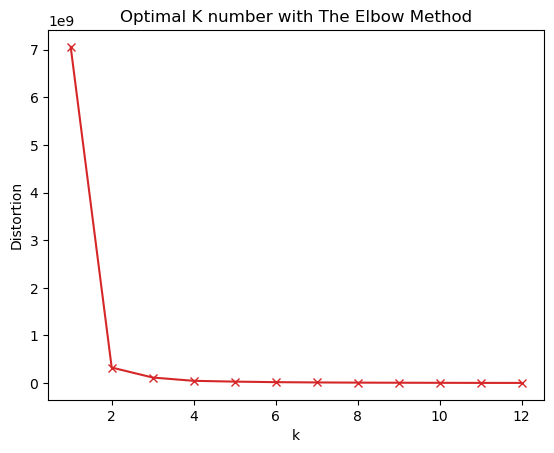

In [39]:
# Importing the necessary function
from scipy.spatial.distance import cdist

# Using the Elbow Method to find the optimal number of clusters on the imputed data

dist = []
K = range(1,13)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(data_filled)
    dist.append(sum(np.min(cdist(data_filled, kmeanModel.cluster_centers_, 'sqeuclidean'), axis=1)) **2)

# Plotting the results to visualize the Elbow
plt.plot(K, dist, 'bx-', color='tab:red')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal K number with The Elbow Method')
plt.show()


After the clustering study, a new data table was created giving the clusters found, city names,
avg. magnitude of earthquakes occurring in cities, and the 10 most common venues in each city.

In [46]:
# Adding the cluster labels to the original df dataframe
df['Cluster Label'] = kmeans_labels

# Displaying the updated dataframe with the cluster labels
df_clustered = df.copy()
df_clustered.head(10)


City  Latitude  Longitude  Avg Depth  Avg Magnitude  \
0            Casablanca   33.5333    -7.5833        0.0           3.75   
1  El Kelaa des Srarhna   32.0481    -7.4083        0.0           2.50   
2                   Fès   34.0433    -5.0033        0.0           3.42   
3               Tangier   35.7767    -5.8039        1.6           3.65   
4             Marrakech   31.6300    -8.0089        0.0           2.50   
5                  Sale   34.0333    -6.8000        0.0           2.50   
6              Mediouna   33.4500    -7.5100        0.0           2.50   
7                 Rabat   34.0209    -6.8416        0.0           2.50   
8                Meknès   33.8950    -5.5547        0.0           3.00   
9           Oujda-Angad   34.6867    -1.9114        0.0           2.50   

   Max Depth  Max Magnitude  Min Depth  Min Magnitude  Cluster Label  
0        0.0            4.0        0.0            3.5              2  
1        0.0            3.0        0.0            1.0              2  
2        0.0            3.9        0.0            3.1              2  
3        1.6            3.7        1.6            3.6              2  
4        0.0            3.0        0.0            1.0              2  
5        0.0            3.0        0.0            1.0              2  
6        0.0            3.0        0.0            1.0              2  
7        0.0            3.0        0.0            1.0              2  
8        0.0            3.0        0.0            3.0              2  
9        0.0            3.0        0.0            1.0              2

In [51]:
# Correcting the drop method usage and recreating the df_last dataframe
df_last = pd.concat([df['Cluster Numbers'], df['City'], df['Avg Magnitude'], city_venues_sorted.drop(columns='City')], axis=1)

# Displaying the first 7 rows of the df_last dataframe
df_last_head = df_last.head(7)
df_last_head


Cluster Numbers                  City  Avg Magnitude 1st Most Common Venue  \
0                2            Casablanca           3.75       Coworking Space   
1                2  El Kelaa des Srarhna           2.50   Housing Development   
2                2                   Fès           3.42                  Café   
3                2               Tangier           3.65   Housing Development   
4                2             Marrakech           2.50              Hospital   
5                2                  Sale           2.50                  Café   
6                2              Mediouna           2.50                 Hotel   

  2nd Most Common Venue   3rd Most Common Venue 4th Most Common Venue  \
0                  Café  Automotive Repair Shop        Hardware Store   
1         Swimming Pool              Restaurant            Nail Salon   
2           Coffee Shop                Pizzeria                Mosque   
3           Post Office                Wine Bar                  Park   
4               Dentist              University       Doctor's Office   
5       Assisted Living      Apartment or Condo                  Bank   
6              Mountain     Moroccan Restaurant       Cosmetics Store   

  5th Most Common Venue 6th Most Common Venue    7th Most Common Venue  \
0          Tech Startup                Office                     Bank   
1        Nursery School                Notary  Non-Profit Organization   
2            Hair Salon           Beer Garden       Apartment or Condo   
3              Mountain                  Lake                    River   
4     College Classroom                Office             Trade School   
5   Housing Development             Structure      Moroccan Restaurant   
6            Restaurant            Club House        Bed and Breakfast   

      8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
0           Doctor's Office   Moroccan Restaurant           Soccer Stadium  
1                Night Club             Newsstand  New American Restaurant  
2                  Pharmacy          Tech Startup    College Arts Building  
3   New American Restaurant        Nursery School                   Notary  
4       Housing Development                Mosque           Hardware Store  
5  Furniture and Home Store  Fast Food Restaurant              Coffee Shop  
6            Medical Center             Gastropub              Observatory

When the __3 clusters detected__ were examined in terms of earthquake risk, they were labeled as
__LOW – MEDIUM – HIGH__. When the average earthquake magnitude of all cities in each
cluster was calculated, the risk ratio by clusters was also determined.

In [52]:
df_color = df_last.groupby('Cluster Numbers').mean(numeric_only=True)


In [57]:
# Ensuring that 'Avg Magnitude' column contains only numeric values
df_color = df_color[df_color['Avg Magnitude'].apply(lambda x: isinstance(x, (int, float)))]

# Sorting, labeling, and coloring based on the average earthquake magnitude
df_color = df_color.sort_values(by='Avg Magnitude')
df_color['Color'] = ["green", "orange", "red"]
df_color['Labels'] = ["LOW", "MEDIUM", "HIGH"]

df_color


Avg Magnitude   Color  Labels
Cluster Numbers                               
2                     2.865806   green     LOW
1                     3.559522  orange  MEDIUM
0                     3.842346     red    HIGH

In [58]:
# Counting the number of cities in each cluster
df_size = df_last.groupby(['Cluster Numbers']).size()
df_size


Cluster Numbers
0     27
1      9
2    113
dtype: int64

In [59]:
# Correctly assigning city counts to the respective clusters in df_color
for cluster in df_size.index:
    df_color.loc[cluster, 'City Count'] = df_size[cluster]

# Displaying the updated df_color dataframe
df_color


Avg Magnitude   Color  Labels  City Count
Cluster Numbers                                           
2                     2.865806   green     LOW       113.0
1                     3.559522  orange  MEDIUM         9.0
0                     3.842346     red    HIGH        27.0

### Pie Chart for Clusters

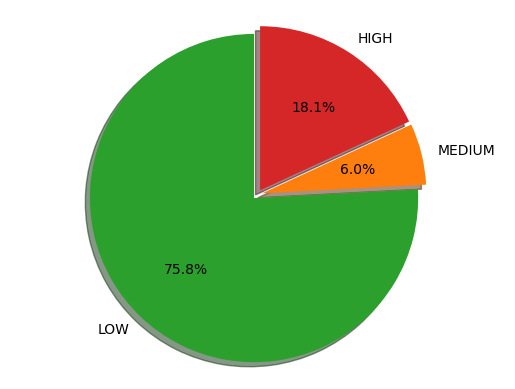

In [60]:
labels = df_color['Labels']
sizes = df_color['City Count']
explode = (0.03, 0.03, 0.03) 
colors_list = df_color['Color'].apply(lambda c: 'tab:{}'.format(c))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors_list, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

### Functions
Useful functions created.

In [61]:
# For Top 20 list
from itertools import islice
def cluster_top_chart(cluster, n=5, t='...', c='b'):
    words = {}
    for i in range(0,cluster.shape[0]):
        for k in range(0,10):
            temp = cluster.iloc[i,3:][k]
            if temp in words:
                words[temp] += 1
            else:
                words[temp] = 1
           
    top = {k: v for k, v in sorted(words.items(), reverse=True, key=lambda item: item[1])}
    items = list(top.items())

    objects = []
    performance = []
    for i in range(0,n):
        objects.append(items[i][0])
        performance.append(items[i][1])

    fig, ax = plt.subplots()
    y_pos = np.arange(len(objects))
    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(objects)
    ax.invert_yaxis()
    ax.set_xlabel('Total Venues')
    ax.set_title('Top {} list of All Most Common Venues in Cluster {}'.format(n,t))

    for cl in range(n):
        ax.get_children()[cl].set_color('tab:{}'.format(c))
        
    plt.show()
    
# Cluster Numbers to Cluster Labels
def cluster_labeling(n=0):
    return df_color.loc[n, 'Labels']

# Cluster Numbers to Cluster Colors
def cluster_coloring(n=0):
    return df_color.loc[n, 'Color']

# Comparison of the first most common venues of the cities in the cluster.
def cluster_first_common_venue(n=0):
    temp = df_last[df_last['Cluster Numbers']==n].groupby(['1st Most Common Venue']).size().sort_values(
         ascending=False).reset_index().rename(columns={0:'Total'}).head(5)
    Groups = np.full((1, temp.shape[0]), cluster_labeling(n))[0]
    MultiIndex = pd.MultiIndex.from_tuples(list(zip(Groups,np.arange(temp.shape[0]))))
    MultiDF = pd.DataFrame(np.array(temp),MultiIndex,['1st Most Common Venue','Total'])
    return MultiDF

In [62]:
# All clusters together
cluster_list = {}

We do not name the cluster in this title. Because the algorithm can generate different ids each time.

## Cluster: 0 

In [63]:
# Initializing the cluster_list dictionary
cluster_list = {}

# Extracting data for the specified cluster (clstr=0) and storing it in the cluster_list dictionary
clstr = 0
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]


Cluster Numbers               City  Avg Magnitude 1st Most Common Venue  \
11                 0             Agadir       5.100000               Factory   
12                 0            Tétouan       3.900000              Pizzeria   
23                 0              Nador       3.350000                  Café   
29                 0      Ksar El Kebir       3.400000                  Café   
30                 0            Larache       3.353846   Housing Development   
45                 0         Sidi Qacem       3.916667                  Café   
48                 0             Martil       3.465217            Restaurant   
51                 0           Ouezzane       3.456667             Structure   
70                 0             Zagora       3.300000                   NaN   
79                 0           Imzouren       3.411818                   NaN   
81                 0  Mechraa Bel Ksiri       3.500000                   NaN   
84                 0             Arfoud       3.533333                   NaN   
104                0           Al Haouz       4.400000                   NaN   
105                0         Oukaimeden       5.400000                   NaN   
106                0          Taroudant       3.700000                   NaN   
108                0         Caïdat Dir       4.724000                   NaN   
109                0              Ahfir       4.400000                   NaN   
115                0    Aïn Beni Mathar       4.100000                   NaN   
116                0           Aïn Leuh       4.400000                   NaN   
120                0            Bouhéme       3.700000                   NaN   
123                0        Chefchaouen       3.511111                   NaN   
130                0          Khemisset       3.650000                   NaN   
133                0              Midar       3.444737                   NaN   
135                0           Oualidia       4.350000                   NaN   
140                0             Recani       3.200000                   NaN   
143                0             Saidia       3.528571                   NaN   
147                0           Taounate       3.547368                   NaN   

    2nd Most Common Venue 3rd Most Common Venue  4th Most Common Venue  \
11                   Bank      Department Store  Sporting Goods Retail   
12             Restaurant    Apartment or Condo               Pharmacy   
23             Restaurant   Moroccan Restaurant                 Office   
29     Italian Restaurant           Coffee Shop         Gym and Studio   
30                 Market      Community Center         Driving School   
45                  Hotel   Moroccan Restaurant             Restaurant   
48    Moroccan Restaurant                 Hotel                  Diner   
51    Office Supply Store           Observatory         Nursery School   
70                    NaN                   NaN                    NaN   
79                    NaN                   NaN                    NaN   
81                    NaN                   NaN                    NaN   
84                    NaN                   NaN                    NaN   
104                   NaN                   NaN                    NaN   
105                   NaN                   NaN                    NaN   
106                   NaN                   NaN                    NaN   
108                   NaN                   NaN                    NaN   
109                   NaN                   NaN                    NaN   
115                   NaN                   NaN                    NaN   
116                   NaN                   NaN                    NaN   
120                   NaN                   NaN                    NaN   
123                   NaN                   NaN                    NaN   
130                   NaN                   NaN                    NaN   
133                   NaN                   NaN               

In [64]:
# City List of Cluster 0.
', '.join(cluster_list[clstr]['City'])

'Agadir, Tétouan, Nador, Ksar El Kebir, Larache, Sidi Qacem, Martil, Ouezzane, Zagora, Imzouren, Mechraa Bel Ksiri, Arfoud, Al Haouz, Oukaimeden, Taroudant, Caïdat Dir, Ahfir, Aïn Beni Mathar, Aïn Leuh, Bouhéme, Chefchaouen, Khemisset, Midar, Oualidia, Recani, Saidia, Taounate'

Now we know which label the cluster has.

In [65]:
# 1st Most Common Venue Counts in Cluster 0.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
HIGH 0                  Café     3
     1               Factory     1
     2   Housing Development     1
     3              Pizzeria     1
     4            Restaurant     1

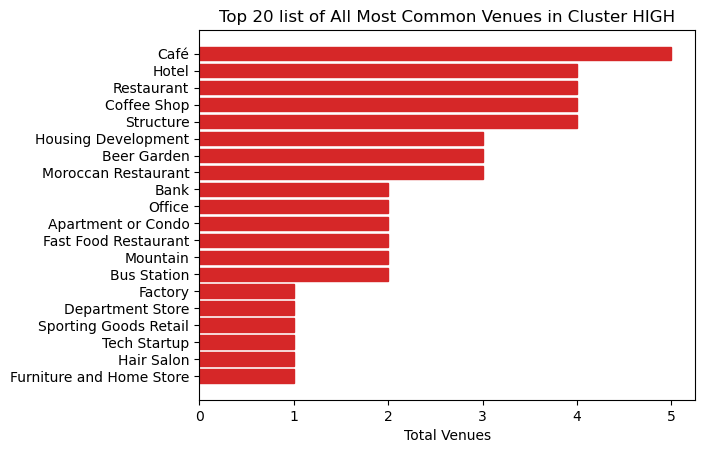

In [66]:
def cluster_top_chart(cluster, n=5, t='...', c='b'):
    words = {}
    for i in range(0, cluster.shape[0]):
        for k in range(0, 10):
            temp = cluster.iloc[i, 3:][k]
            if str(temp) != "nan":
                if temp in words:
                    words[temp] += 1
                else:
                    words[temp] = 1

    top = {k: v for k, v in sorted(words.items(), reverse=True, key=lambda item: item[1])}
    items = list(top.items())

    objects = []
    performance = []
    for i in range(0, n):
        objects.append(items[i][0])
        performance.append(items[i][1])

    fig, ax = plt.subplots()
    y_pos = np.arange(len(objects))
    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(objects)
    ax.invert_yaxis()
    ax.set_xlabel('Total Venues')
    ax.set_title('Top {} list of All Most Common Venues in Cluster {}'.format(n, t))

    for cl in range(n):
        ax.get_children()[cl].set_color('tab:{}'.format(c))

    plt.show()

# Display the Top 20 list of 1 to 10 most common venues in Cluster 0, excluding 'nan'.
cluster_top_chart(cluster_list[clstr], n=20, t=cluster_labeling(clstr), c=cluster_coloring(clstr))


In [67]:
# Average earthquake magnitude in Cluster 0.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster HIGH: 3.84


## Cluster: 1 

In [68]:
clstr = 1
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]

Cluster Numbers          City  Avg Magnitude 1st Most Common Venue  \
24                 1          Taza       3.550000                 Hotel   
32                 1       Berkane       3.266667                  Café   
62                 1     Al Aaroui       4.158333  Fast Food Restaurant   
75                 1          Zaïo       3.888889                   NaN   
103                1  Bni Bouayach       3.439655                   NaN   
107                1   Tirhanimîne       3.444744                   NaN   
112                1    Al Hoceima       3.464789                   NaN   
113                1        Asilah       3.447619                   NaN   
122                1  Cap Negro II       3.375000                   NaN   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
24    Moroccan Restaurant            Restaurant                Hostel   
32                 Resort   Moroccan Restaurant                 Diner   
62                   Café           Coffee Shop           Snack Place   
75                    NaN                   NaN                   NaN   
103                   NaN                   NaN                   NaN   
107                   NaN                   NaN                   NaN   
112                   NaN                   NaN                   NaN   
113                   NaN                   NaN                   NaN   
122                   NaN                   NaN                   NaN   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
24     Apartment or Condo            Street Art  Fast Food Restaurant   
32            Coffee Shop            Restaurant                   Pub   
62             Restaurant                 Diner             Pool Hall   
75                    NaN                   NaN                   NaN   
103                   NaN                   NaN                   NaN   
107                   NaN                   NaN                   NaN   
112                   NaN                   NaN                   NaN   
113                   NaN                   NaN                   NaN   
122                   NaN                   NaN                   NaN   

    8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
24                 Resort     Bed and Breakfast                   Park  
32             Street Art             City Hall            Snack Place  
62            Beer Garden           Social Club       Harbor or Marina  
75                    NaN                   NaN                    NaN  
103                   NaN                   NaN                    NaN  
107                   NaN                   NaN                    NaN  
112                   NaN                   NaN                    NaN  
113                   NaN                   NaN                    NaN  
122                   NaN                   NaN                    NaN

In [69]:
# City List of Cluster 1.
', '.join(cluster_list[clstr]['City'])

'Taza, Berkane, Al Aaroui, Zaïo, Bni Bouayach, Tirhanimîne, Al Hoceima, Asilah, Cap Negro II'

In [70]:
# 1st Most Common Venue Counts in Cluster 1.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
MEDIUM 0                  Café     1
       1  Fast Food Restaurant     1
       2                 Hotel     1

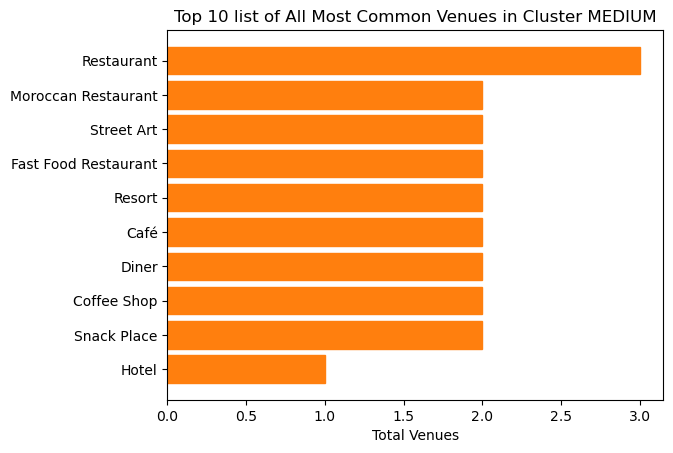

In [71]:
# Top Venues in Cluster 1.
cluster_top_chart(cluster_list[clstr], n=10, t=cluster_labeling(clstr), c=cluster_coloring(clstr))

In [72]:
# Average earthquake magnitude in Cluster 1.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster MEDIUM: 3.56


## Cluster: 2

In [73]:
clstr = 2
cluster_list[clstr] = df_last[df_last['Cluster Numbers'] == clstr]
cluster_list[clstr]

Cluster Numbers                          City  Avg Magnitude  \
0                  2                    Casablanca       3.750000   
1                  2          El Kelaa des Srarhna       2.500000   
2                  2                           Fès       3.420000   
3                  2                       Tangier       3.650000   
4                  2                     Marrakech       2.500000   
5                  2                          Sale       2.500000   
6                  2                      Mediouna       2.500000   
7                  2                         Rabat       2.500000   
8                  2                        Meknès       3.000000   
9                  2                   Oujda-Angad       2.500000   
10                 2                       Kenitra       3.700000   
13                 2                      Taourirt       3.500000   
14                 2                        Temara       2.500000   
15                 2                          Safi       2.500000   
16                 2                      Khénifra       2.500000   
17                 2                      Laâyoune       2.500000   
18                 2                    Mohammedia       2.500000   
19                 2                      Kouribga       2.500000   
20                 2                      El Jadid       2.500000   
21                 2                   Béni Mellal       2.500000   
22                 2                   Ait Melloul       2.500000   
25                 2                        Settat       2.500000   
26                 2                     Barrechid       2.500000   
27                 2                   Al Khmissat       2.500000   
28                 2                      Inezgane       2.500000   
31                 2                       Guelmim       3.100000   
33                 2                  Khemis Sahel       2.500000   
34                 2                     Ad Dakhla       2.500000   
35                 2                     Bouskoura       2.500000   
36                 2             Al Fqih Ben Çalah       2.500000   
37                 2                      Oued Zem       4.100000   
38                 2                  Sidi Slimane       2.500000   
39                 2                    Errachidia       4.000000   
40                 2                       Guercif       3.366667   
41                 2                   Oulad Teïma       2.500000   
42                 2                    Ben Guerir       2.500000   
43                 2                        Sefrou       3.100000   
44                 2                         Fnidq       2.500000   
46                 2               Moulay Abdallah       2.500000   
47                 2                    Youssoufia       2.500000   
49                 2                  Aïn Harrouda       2.500000   
50                 2                      Skhirate       2.500000   
52                 2               Sidi Yahya Zaer       2.500000   
53                 2                    Al Hoceïma       2.500000   
54                 2                         M’diq       2.500000   
55                 2                  Sidi Bennour       2.500000   
56                 2                        Midalt       2.500000   
57                 2                         Azrou       3.575000   
58                 2                     My Drarga       2.500000   
59                 2                  Ain El Aouda       2.500000   
60                 2                  Beni Yakhlef       2.500000   
61                 2                      Ad Darwa       2.500000   
63                 2                  Qasbat Tadla       2.500000   
64                 2                        Boujad       2.500000   
65                 2                        Jerada       3.500000   
66                 2                         Mrirt       2.500000   
67                 2                      El Aïoun       2.500000   
68 

In [74]:
# City List of Cluster 2.
', '.join(cluster_list[clstr]['City'])

'Casablanca, El Kelaa des Srarhna, Fès, Tangier, Marrakech, Sale, Mediouna, Rabat, Meknès, Oujda-Angad, Kenitra, Taourirt, Temara, Safi, Khénifra, Laâyoune, Mohammedia, Kouribga, El Jadid, Béni Mellal, Ait Melloul, Settat, Barrechid, Al Khmissat, Inezgane, Guelmim, Khemis Sahel, Ad Dakhla, Bouskoura, Al Fqih Ben Çalah, Oued Zem, Sidi Slimane, Errachidia, Guercif, Oulad Teïma, Ben Guerir, Sefrou, Fnidq, Moulay Abdallah, Youssoufia, Aïn Harrouda, Skhirate, Sidi Yahya Zaer, Al Hoceïma, M’diq, Sidi Bennour, Midalt, Azrou, My Drarga, Ain El Aouda, Beni Yakhlef, Ad Darwa, Qasbat Tadla, Boujad, Jerada, Mrirt, El Aïoun, Azemmour, Temsia, Ait Ourir, Aziylal, Sidi Yahia El Gharb, Biougra, Aguelmous, El Hajeb, Zeghanghane, Tit Mellil, Al ’Attawia, Demnat, Tameslouht, Bou Arfa, Sidi Smai’il, Souk et Tnine Jorf el Mellah, Mehdya, Aïn Taoujdat, Chichaoua, Tahla, Oulad Yaïch, Moulay Bousselham, Iheddadene, Missour, Zawyat ech Cheïkh, Bouknadel, Oulad Tayeb, Oulad Barhil, Bir Jdid, Tifariti, Ait Massa

In [75]:
# 1st Most Common Venue Counts in Cluster 2.
cluster_first_common_venue(clstr)

1st Most Common Venue Total
LOW 0                  Café    12
    1                 Hotel     6
    2   Housing Development     6
    3   Moroccan Restaurant     4
    4           Coffee Shop     3

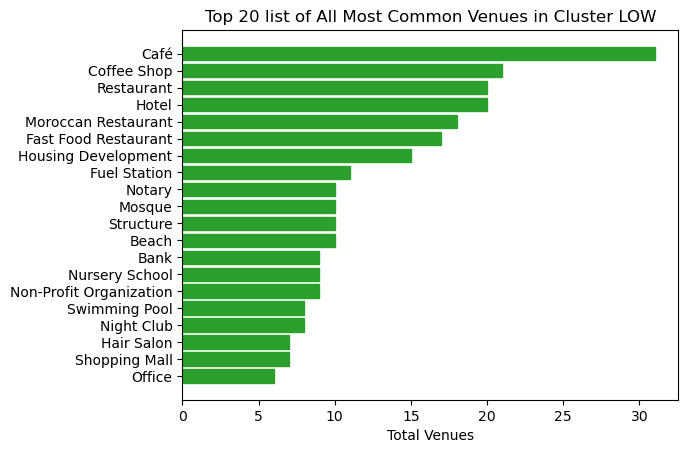

In [76]:
# Top Venues in Cluster 2.
cluster_top_chart(cluster_list[clstr], n=20, t=cluster_labeling(clstr), c=cluster_coloring(clstr))

In [77]:
# Average earthquake magnitude in Cluster 2.
eq_coef = cluster_list[clstr]['Avg Magnitude'].mean()
print('Average earthquake magnitude in Cluster {}: {}'.format(cluster_labeling(clstr),round(eq_coef,2)))

Average earthquake magnitude in Cluster LOW: 2.87


### Pre-Mapping Process

In [78]:
# Adding Latitude and Longitude for mapping.
df_last['Latitude'] = df['Latitude']
df_last['Longitude'] = df['Longitude'] 
df_last

Cluster Numbers                          City  Avg Magnitude  \
0                  2                    Casablanca       3.750000   
1                  2          El Kelaa des Srarhna       2.500000   
2                  2                           Fès       3.420000   
3                  2                       Tangier       3.650000   
4                  2                     Marrakech       2.500000   
5                  2                          Sale       2.500000   
6                  2                      Mediouna       2.500000   
7                  2                         Rabat       2.500000   
8                  2                        Meknès       3.000000   
9                  2                   Oujda-Angad       2.500000   
10                 2                       Kenitra       3.700000   
11                 0                        Agadir       5.100000   
12                 0                       Tétouan       3.900000   
13                 2                      Taourirt       3.500000   
14                 2                        Temara       2.500000   
15                 2                          Safi       2.500000   
16                 2                      Khénifra       2.500000   
17                 2                      Laâyoune       2.500000   
18                 2                    Mohammedia       2.500000   
19                 2                      Kouribga       2.500000   
20                 2                      El Jadid       2.500000   
21                 2                   Béni Mellal       2.500000   
22                 2                   Ait Melloul       2.500000   
23                 0                         Nador       3.350000   
24                 1                          Taza       3.550000   
25                 2                        Settat       2.500000   
26                 2                     Barrechid       2.500000   
27                 2                   Al Khmissat       2.500000   
28                 2                      Inezgane       2.500000   
29                 0                 Ksar El Kebir       3.400000   
30                 0                       Larache       3.353846   
31                 2                       Guelmim       3.100000   
32                 1                       Berkane       3.266667   
33                 2                  Khemis Sahel       2.500000   
34                 2                     Ad Dakhla       2.500000   
35                 2                     Bouskoura       2.500000   
36                 2             Al Fqih Ben Çalah       2.500000   
37                 2                      Oued Zem       4.100000   
38                 2                  Sidi Slimane       2.500000   
39                 2                    Errachidia       4.000000   
40                 2                       Guercif       3.366667   
41                 2                   Oulad Teïma       2.500000   
42                 2                    Ben Guerir       2.500000   
43                 2                        Sefrou       3.100000   
44                 2                         Fnidq       2.500000   
45                 0                    Sidi Qacem       3.916667   
46                 2               Moulay Abdallah       2.500000   
47                 2                    Youssoufia       2.500000   
48                 0                        Martil       3.465217   
49                 2                  Aïn Harrouda       2.500000   
50                 2                      Skhirate       2.500000   
51                 0                      Ouezzane       3.456667   
52                 2               Sidi Yahya Zaer       2.500000   
53                 2                    Al Hoceïma       2.500000   
54                 2                         M’diq       2.500000   
55                 2                  Sidi Bennour       2.500000   
56                 2                        Midalt       2.500000   
57 

### Morocco Map with Cluster dots.
The dots shown in Red on the map above belong to Cluster HIGH, which has the highest
earthquake risk. Orange dots represent MEDIUM and Green dots represent Cluster LOW.

In [79]:
import folium

# Filter out rows with missing latitude or longitude values
df_last = df_last.dropna(subset=['Latitude', 'Longitude'])

# Create the map
cluster_map = folium.Map(location=[tr_lat, tr_lon], zoom_start=6)

for lat, lon, lbl, c, mag in zip(df_last['Latitude'], df_last['Longitude'], df_last['Cluster Numbers'], df_last['City'], df_last['Avg Magnitude']):
    html="<b>Cluster:</b> " + str(cluster_labeling(lbl)) + " | <b>City:</b> " + str(c)
    label = folium.Popup(html, parse_html=False)
    fill_color = cluster_coloring(lbl)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=fill_color,
        fill_opacity=1
    ).add_to(cluster_map)

cluster_map


# Final

In [83]:
# Reload earthquake data
earthquake_data = pd.read_csv('/Users/ymadigital/Downloads/earthquake_ma.csv')

# Inspect the first few rows of the earthquake data
earthquake_data.head()

Eq_Latitude  Eq_Longitude   Depth  Magnitude    City
0      31.0451       -8.4611  10.000        4.2  Agadir
1      30.9061       -8.4769  10.000        4.9  Agadir
2      31.0643       -8.3907  25.978        6.8  Agadir
3      35.0303       -3.9547  15.028        4.5  Agadir
4      35.0177       -3.8262  10.000        4.4   Ahfir

In [85]:
# Calculate the correlation coefficient between Depth and Magnitude
correlation_coefficient = earthquake_data['Depth'].corr(earthquake_data['Magnitude'])
correlation_coefficient

0.12284542535135692

The correlation coefficient between Depth and Magnitude in the earthquake data is approximately 
0.123. 

This indicates a weak positive linear relationship between the depth of the earthquake and its magnitude. In other words, as the depth of an earthquake increases, its magnitude tends to increase slightly, but the relationship is not strong.

In [93]:
import folium
from folium.plugins import HeatMap


# Checking the columns of the earthquake dataset
HM_earthquake = pd.read_csv('/Users/ymadigital/Downloads/earthquake_ma.csv')


# Create a base map using the average latitude and longitude values
m = folium.Map(location=[HM_earthquake['Eq_Latitude'].mean(), HM_earthquake['Eq_Longitude'].mean()], zoom_start=6)

# Add earthquake data to the map as a heatmap
heat_data = [[row['Eq_Latitude'], row['Eq_Longitude']] for index, row in HM_earthquake.iterrows()]
HeatMap(heat_data).add_to(m)

m

# Proximity to Fault Lines:

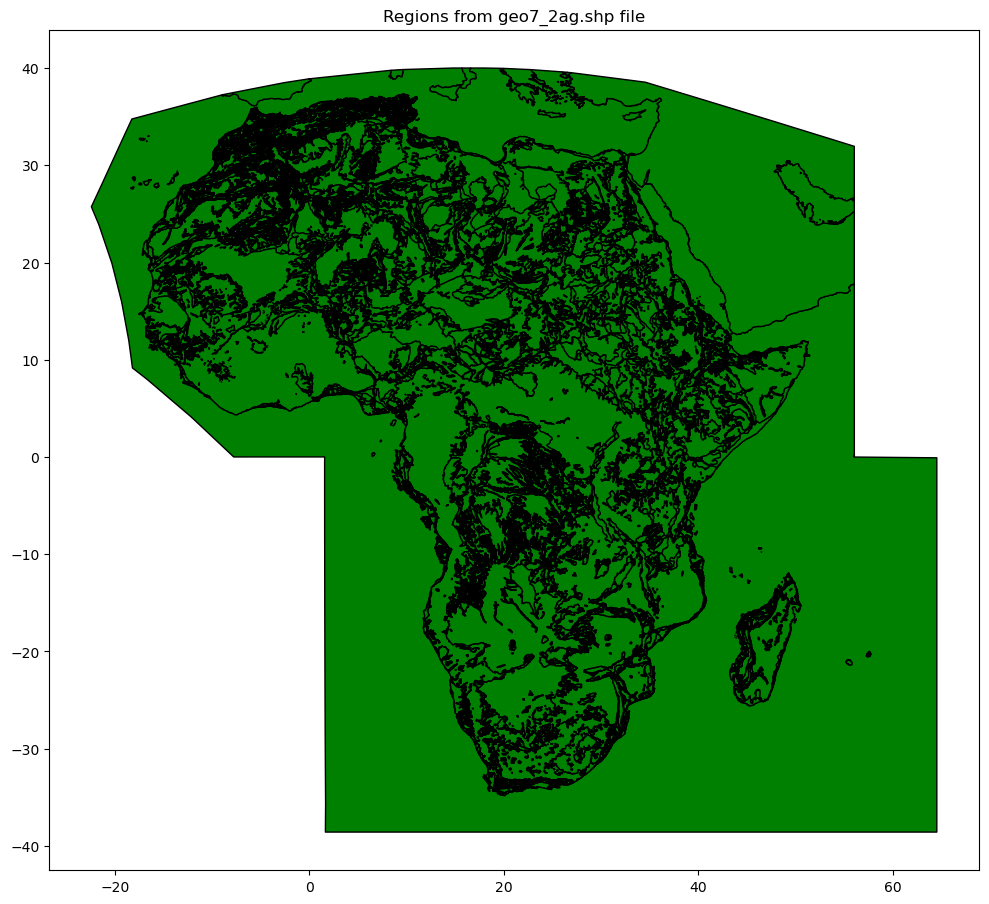

In [15]:
import zipfile
import os
import geopandas as gpd

# Loading the geo7_2ag.shp data into a dataframe
df_geo7_2ag = gpd.read_file("/Users/ymadigital/Downloads/geo7_2ag/geo7_2ag.shp")

# Visualizing the regions
fig, ax = plt.subplots(figsize=(12, 12))
df_geo7_2ag.plot(ax=ax, color='green', edgecolor='black')
ax.set_title('Regions from geo7_2ag.shp file')
plt.show()

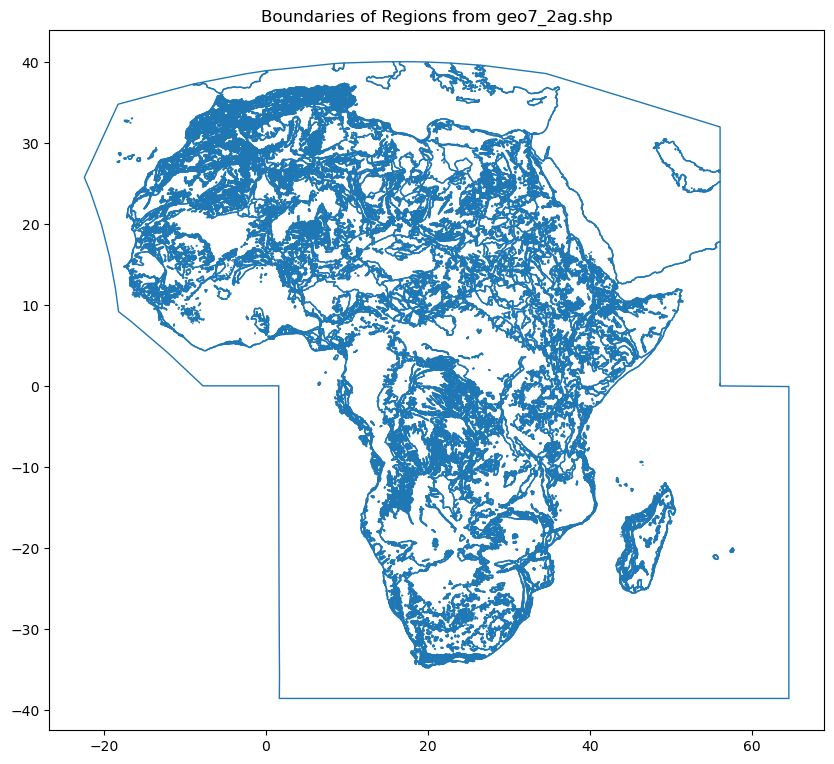

In [16]:
# Load the shapefile data again
geo7_path = "/Users/ymadigital/Downloads/geo7_2ag/geo7_2ag.shp"
geo_df = gpd.read_file(geo7_path)

# Plotting the boundaries of the regions
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.boundary.plot(ax=ax, linewidth=1)
ax.set_title("Boundaries of Regions from geo7_2ag.shp")
plt.show()

In [9]:
from PyPDF2 import PdfReader

# Open the file in read-binary mode
with open("/Users/ymadigital/Downloads/ScienceDirect_articles_14Sep2023_17-00-32.456/Active-tectonics-in-the-Moroccan-High-Atlas_2006_Comptes-Rendus-Geoscience.pdf", "rb") as file:
    # Initialize PDF reader
    pdf_reader = PdfReader(file)
    
    # Extract text from each page
    text = ""
    for page_num in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[page_num].extract_text()
        
print(text[:1000])  # Display the first 1000 characters of the extracted text for review

C. R. Geoscience 338 (2006) 65–79
http://france.elsevier.com/direct/CRAS2A/
Geodynamics
Active tectonics in the Moroccan High Atlas
Michel Sébriera,∗, Lionel Siameb, El Mostafa Zouinec, Thierry Winterd,
Yves Missenarde, Pascale Leturmye
aUMR Tectonique, CNRS–université Pierre-et-Marie-Curie, case 129, 4, place Jussieu, 75252 Paris cedex 05, France
bUniversité Paul-Cézanne (Aix–Marseille-3) – CEREGE, Europôle de l’Arbois, BP 80, 13545 Aix-en-Provence cedex 4, France
cENS Rabat Takadoum, BP 5118 Rabat, Maroc
dBRGM, Orléans, France
eUMR Tectonique, CNRS–université de Cergy-Pontoise, 5, mail Gay-Lussac, Neuville-sur-Oise,
95031 Cergy-Pontoise cedex, France
Received 5 November 2005; accepted after revision 28 November 2005
Available online 10 January 2006
Written on invitation of the Editorial Board
Abstract
Review of seismological and structural data coupled with new data on topographical, geomorphology, and Quaternary geology
allows delineating the major active faults of the High Atlas. T

In [10]:
# Searching for relevant keywords in the extracted text
keywords = ["fault", "tectonic", "seismological", "seismic", "rift", "crustal", "deformation"]
keyword_data = {}

# Extracting sections related to each keyword
for keyword in keywords:
    keyword_data[keyword] = text.lower().count(keyword)

keyword_data


{'fault': 129,
 'tectonic': 33,
 'seismological': 1,
 'seismic': 54,
 'rift': 2,
 'crustal': 10,
 'deformation': 26}

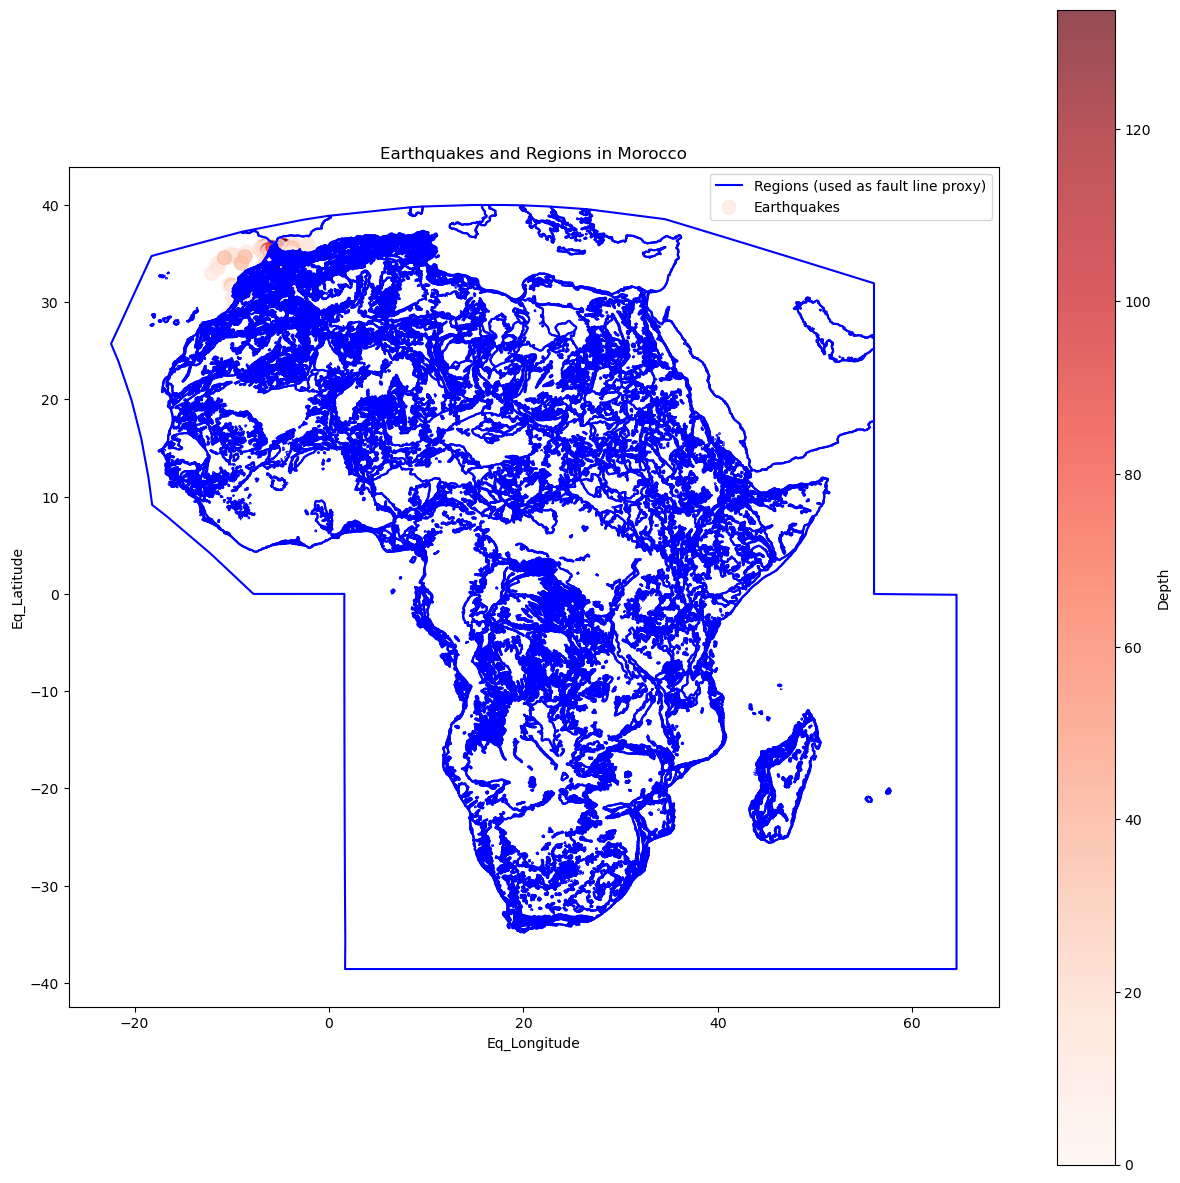

In [20]:
# Load the regions from the geo7_2ag.shp file
regions_gdf = gpd.read_file("/Users/ymadigital/Downloads/geo7_2ag/geo7_2ag.shp")
df_earthquake_ma = pd.read_csv("/Users/ymadigital/Downloads/earthquake_ma.csv")
# Plotting
# Using the correct column names to plot the earthquakes
fig, ax = plt.subplots(figsize=(15, 15))
regions_gdf.boundary.plot(ax=ax, color='blue', label='Regions (used as fault line proxy)')
df_earthquake_ma.plot(ax=ax, kind='scatter', x='Eq_Longitude', y='Eq_Latitude', c='Depth', cmap='Reds', s=100, label='Earthquakes', alpha=0.7)
ax.set_title("Earthquakes and Regions in Morocco")
ax.legend()
plt.show()

In [ ]:
from shapely.geometry import Point
from shapely.ops import nearest_points

# Create a function to get the nearest distance from an earthquake point to the regions (assumed fault lines)
def get_distance_to_nearest_region(point, regions):
    # Find the nearest point of the regions to the earthquake point
    nearest_geom = nearest_points(point, regions.unary_union)[1]
    return point.distance(nearest_geom)

# Correct the column names and calculate the distance from each earthquake event to the nearest boundary of the regions
geometry = [Point(xy) for xy in zip(df_earthquake_ma['Eq_Longitude'], df_earthquake_ma['Eq_Latitude'])]
df_earthquake_ma = gpd.GeoDataFrame(df_earthquake_ma, geometry=geometry)

df_earthquake_ma['distance_to_nearest_region'] = df_earthquake_ma['geometry'].apply(lambda x: get_distance_to_nearest_region(x, regions_gdf))

df_earthquake_ma[['Eq_Latitude', 'Eq_Longitude', 'Magnitude', 'Depth', 'distance_to_nearest_region']].head()

In [32]:
import random
regions_gdf = gpd.read_file("/Users/ymadigital/Downloads/geo7_2ag/geo7_2ag.shp")

# Convert earthquake locations to a GeoDataFrame using the correct columns
gdf_earthquakes = gpd.GeoDataFrame(
    df_earthquake_ma, geometry=gpd.points_from_xy(df_earthquake_ma.Eq_Longitude, df_earthquake_ma.Eq_Latitude))

# Define the function to calculate minimum distance from a point to a set of geometries (regions in our case)
def min_distance(point, regions):
    return regions.distance(point).min()

# Calculate distance of each earthquake to the nearest "fault line"
gdf_earthquakes['distance_to_fault'] = gdf_earthquakes['geometry'].apply(lambda x: min_distance(x, selected_regions['geometry']))

# Display first few rows of the dataset with the calculated distances
gdf_earthquakes.head(20)


/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_6526/3655788785.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return regions.distance(point).min()


Eq_Latitude  Eq_Longitude   Depth  Magnitude             City  \
0       31.0451       -8.4611  10.000        4.2           Agadir   
1       30.9061       -8.4769  10.000        4.9           Agadir   
2       31.0643       -8.3907  25.978        6.8           Agadir   
3       35.0303       -3.9547  15.028        4.5           Agadir   
4       35.0177       -3.8262  10.000        4.4            Ahfir   
5       35.0455       -3.8846  10.000        4.1  Aïn Beni Mathar   
6       34.9885       -3.8382  10.000        4.4         Aïn Leuh   
7       34.9950       -3.9009  10.000        4.9        Al Aaroui   
8       30.3325       -9.5904  10.000        4.1        Al Aaroui   
9       35.5367       -3.4806  10.000        4.4        Al Aaroui   
10      35.4546       -3.6108  10.000        4.3        Al Aaroui   
11      35.4758       -3.5546  10.000        4.3        Al Aaroui   
12      35.3062       -4.0765  10.000        4.3        Al Aaroui   
13      35.4713       -3.4838  15.504        4.5        Al Aaroui   
14      35.2919       -3.6514  10.000        4.9        Al Aaroui   
15      35.5593       -3.4635  10.000        4.0        Al Aaroui   
16      35.4414       -3.6393  10.000        4.0        Al Aaroui   
17      35.4923       -3.5369  10.000        4.1        Al Aaroui   
18      35.4506       -3.6166  10.000        4.0        Al Aaroui   
19      35.6277       -3.4835  10.000        4.5        Al Aaroui   

                     geometry  distance_to_fault  
0   POINT (-8.46110 31.04510)           5.426167  
1   POINT (-8.47690 30.90610)           5.383622  
2   POINT (-8.39070 31.06430)           5.370598  
3   POINT (-3.95470 35.03030)           6.219048  
4   POINT (-3.82620 35.01770)           6.197040  
5   POINT (-3.88460 35.04550)           6.228735  
6   POINT (-3.83820 34.98850)           6.168673  
7   POINT (-3.90090 34.99500)           6.179577  
8   POINT (-9.59040 30.33250)           6.252013  
9   POINT (-3.48060 35.53670)           6.703794  
10  POINT (-3.61080 35.45460)           6.623887  
11  POINT (-3.55460 35.47580)           6.643824  
12  POINT (-4.07650 35.30620)           6.504916  
13  POINT (-3.48380 35.47130)           6.638419  
14  POINT (-3.65140 35.29190)           6.462483  
15  POINT (-3.46350 35.55930)           6.726297  
16  POINT (-3.63930 35.44140)           6.611514  
17  POINT (-3.53690 35.49230)           6.660025  
18  POINT (-3.61660 35.45060)           6.620045  
19  POINT (-3.48350 35.62770)           6.794812

Let's proceed with this analysis using the distance bins you've seen earlier:

Very close: 0 - 50 km

Close: 50 - 100 km

Moderate: 100 - 200 km

Far: > 200 km

In [33]:
# Categorizing earthquakes based on their proximity to the fault lines using the distance bins
bins = [0, 50, 100, 200, np.inf]
labels = ['Very close (0-50km)', 'Close (50-100km)', 'Moderate (100-200km)', 'Far (>200km)']
gdf_earthquakes['distance_category'] = pd.cut(gdf_earthquakes['distance_to_fault'], bins=bins, labels=labels, right=False)

# Analyzing average magnitude and frequency of earthquakes in each category
avg_magnitude = gdf_earthquakes.groupby('distance_category')['Magnitude'].mean()
frequency = gdf_earthquakes['distance_category'].value_counts()

proximity_analysis = pd.DataFrame({
    'Average Magnitude': avg_magnitude,
    'Frequency': frequency
}).reset_index()

proximity_analysis

distance_category  Average Magnitude  Frequency
0   Very close (0-50km)           3.547249       1821
1      Close (50-100km)                NaN          0
2  Moderate (100-200km)                NaN          0
3          Far (>200km)                NaN          0

In [38]:
from docx import Document

# Load the docx file
doc = Document("/Users/ymadigital/Downloads/Tectonics-of-the-North-African-Variscides--Morocco--we_2006_Comptes-Rendus-G.docx")

# Extract text from the docx file
full_text = []
for para in doc.paragraphs:
    full_text.append(para.text)

# Join the list of paragraphs to form a single string
doc_text = '\n'.join(full_text)

# Check first 1000 characters of the extracted text
doc_text[:1000]


'\n\n\nC. R. Geoscience 338 (2006) 25–40\n\nGeodynamics\n\n\n\n\nTectonics of the North African Variscides (Morocco, western Algeria): an outline\nChristian Hoepffner ,, Mohamed Rachid Houari , Mohamed Bouabdelli \na Département de géologie, faculté des sciences, université Mohammed-V–Agdal, BP 1014, Rabat, Maroc\nb Département de géologie, faculté des sciences, université Mohammed-Ier, Oujda, Maroc\nc Département de géologie, faculté des sciences, université Cadi-Ayad, BP 2390, Marrakech 4001, Maroc\nReceived 4 October 2005; accepted after revision 18 October 2005\nAvailable online 4 January 2006 Written on invitation of the Editorial Board\n\nAbstract\nThe Palaeozoic terranes that crop out north of the South Atlasic Line constitute the Variscan Belt of North Africa. Subdivision of the belt into five structural zones separated by major shear zones results from a polyphase evolution including very localised Prevariscan events (450–430 Ma), which correspond to the Caledonian cycle, and 

In [40]:
# Keywords to search for
keywords = ['fault', 'line', 'tectonic', 'seismic', 'earthquake', 'boundary']

# Search for the keywords in the document text and store relevant paragraphs
relevant_paragraphs = []

for para in full_text:
    if any(keyword in para.lower() for keyword in keywords):
        relevant_paragraphs.append(para)

# Return the relevant paragraphs
relevant_paragraphs[:10]  # Displaying the first 10 relevant paragraphs for brevity.

['Tectonics of the North African Variscides (Morocco, western Algeria): an outline',
 'Available online 4 January 2006 Written on invitation of the Editorial Board',
 'The Palaeozoic terranes that crop out north of the South Atlasic Line constitute the Variscan Belt of North Africa. Subdivision of the belt into five structural zones separated by major shear zones results from a polyphase evolution including very localised Prevariscan events (450–430 Ma), which correspond to the Caledonian cycle, and Variscan events involving three main stages: Eovariscan (370–360 Ma), Mesovariscan (330–320 Ma), and Neovariscan (300–290 Ma), followed by Tardi-Variscan events during Early Permian–Triassic times. During the Variscan evolution, the geodynamic context is transtensive–transpressive, and controls the opening and closure of Devono-Carboniferous basins. The Variscan deformations are accommodated by folding and combination of thrusting and strike-slip faulting associated with a low-grade to medi

I've extracted paragraphs from the document that mention keywords related to tectonics and fault lines. Here are some key points from the extracted content:

The Palaeozoic terranes north of the South Atlasic Line constitute the Variscan Belt of North Africa. This belt has a polyphase evolution including very localized Prevariscan events and Variscan events.

The geodynamic context during the Variscan evolution is transtensive–transpressive, which controls the opening and closure of Devono-Carboniferous basins. This evolution involves a combination of thrusting and strike-slip faulting associated with a low-grade to medium-grade metamorphic evolution.

The Southern Zone marks the limit between the Mesetan and Saharan domains, located south of the Atlas Palaeozoic Transform Zone (APTZ). The Variscan deformation in this zone is stronger than in the Anti-Atlas, but metamorphism is minimal.

A possible 'Caledonian' belt wraps around the northwestern Meseta. The convergence between these domains might have been achieved by ductile wrenching and/or thrusting prior to the Late Silurian.

### Insights from the Document:

Variscan Belt of North Africa: The Palaeozoic terranes north of the South Atlasic Line belong to this belt. It's mentioned that this belt has a polyphase evolution, indicating that it's been geologically active over multiple phases.

#### Geodynamic Context:  The document mentions a transtensive–transpressive context, which means the region has experienced both extension and compression forces. This kind of geodynamic activity can lead to the formation of basins and is also associated with thrusting and strike-slip faulting.

#### Atlas Palaeozoic Transform Zone (APTZ): Located south of the APTZ is the Southern Zone, which has experienced stronger Variscan deformation than the Anti-Atlas. While the metamorphism is minimal, the increased deformation suggests significant tectonic activity.

#### Possible 'Caledonian' Belt: This belt wraps around the northwestern Meseta. It's indicated that the convergence between certain domains may have been achieved by ductile wrenching or thrusting before the Late Silurian.



### Implications for Earthquake Analysis:

Areas of Interest: Given the mention of the Variscan Belt, the APTZ, and the Caledonian Belt, these areas can be primary regions of interest. Earthquakes in these regions might be associated with the geodynamic activities of these belts.

##### Tectonic Activities: The transtensive–transpressive geodynamic context suggests that both thrusting (which can lead to significant vertical displacements) and strike-slip faulting (horizontal displacements) are prevalent. Earthquakes resulting from these types of faulting can differ in their impact and characteristics.

##### Depth Correlation: As the Southern Zone has experienced significant deformation but minimal metamorphism, we might expect earthquakes in this region to be shallower compared to regions with high-grade metamorphism.

In [52]:
import zipfile
import os
import geopandas as gpd

# Unzip the provided file
zip_path = "/Users/ymadigital/Downloads/morocco-latest-free.shp.zip"
unzip_dir = "/Users/ymadigital/Downloads/morocco_shp_data"

# Unzip the file if it hasn't been unzipped already
if not os.path.exists(unzip_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)

# List the files in the unzipped directory
file_list = os.listdir(unzip_dir)
print(file_list)

# Load the 'gis_osm_natural_a_free_1.shp' dataset
natural_features_gdf = gpd.read_file(os.path.join(unzip_dir, "gis_osm_natural_a_free_1.shp"))

# Display the first few rows of the dataset and its unique natural feature types
print(natural_features_gdf.head())
print(natural_features_gdf['fclass'].unique())


['gis_osm_natural_a_free_1.prj', 'gis_osm_places_a_free_1.dbf', 'gis_osm_places_free_1.prj', 'gis_osm_transport_free_1.dbf', 'gis_osm_pofw_a_free_1.prj', 'gis_osm_pois_free_1.prj', 'gis_osm_water_a_free_1.dbf', 'gis_osm_traffic_a_free_1.prj', 'gis_osm_pofw_free_1.dbf', 'gis_osm_traffic_free_1.prj', 'gis_osm_natural_free_1.cpg', 'gis_osm_landuse_a_free_1.shp', 'gis_osm_railways_free_1.prj', 'gis_osm_landuse_a_free_1.cpg', 'gis_osm_natural_free_1.shp', 'gis_osm_transport_a_free_1.prj', 'gis_osm_waterways_free_1.dbf', 'gis_osm_buildings_a_free_1.dbf', 'gis_osm_landuse_a_free_1.shx', 'gis_osm_natural_free_1.shx', 'gis_osm_buildings_a_free_1.shp', 'gis_osm_waterways_free_1.cpg', 'gis_osm_waterways_free_1.shp', 'gis_osm_buildings_a_free_1.cpg', 'gis_osm_pois_a_free_1.prj', 'gis_osm_pofw_free_1.shx', 'gis_osm_buildings_a_free_1.shx', 'gis_osm_waterways_free_1.shx', 'gis_osm_natural_free_1.dbf', 'gis_osm_landuse_a_free_1.dbf', 'gis_osm_pofw_free_1.cpg', 'gis_osm_roads_free_1.prj', 'gis_osm_pof

Based on typical geological features associated with seismic activity, we'll consider the following features:

cliff: These might indicate significant geological formations or fault scarps.

peak: Mountain peaks can be indicators of tectonic activity.

ridge: Ridges can also be formed due to tectonic forces.

volcano: Volcanic activity is directly related to tectonics.

In [56]:
# Convert earthquake locations to a GeoDataFrame using the correct columns
gdf_earthquakes = gpd.GeoDataFrame(
    df_earthquake_ma, geometry=gpd.points_from_xy(df_earthquake_ma.Eq_Longitude, df_earthquake_ma.Eq_Latitude))

# Calculate the distance of each earthquake to the nearest selected geological feature
gdf_earthquakes['distance_to_feature'] = gdf_earthquakes['geometry'].apply(lambda x: min_distance_to_feature(x, selected_features_gdf))

# Display the first few rows of the dataset with the calculated distances
gdf_earthquakes.head()


/var/folders/1s/8_yq4qfn4wg43t727cpmhgb40000gn/T/ipykernel_6526/1568946607.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return features_gdf.distance(point).min()


Eq_Latitude  Eq_Longitude   Depth  Magnitude    City  \
0      31.0451       -8.4611  10.000        4.2  Agadir   
1      30.9061       -8.4769  10.000        4.9  Agadir   
2      31.0643       -8.3907  25.978        6.8  Agadir   
3      35.0303       -3.9547  15.028        4.5  Agadir   
4      35.0177       -3.8262  10.000        4.4   Ahfir   

                    geometry  distance_to_feature  
0  POINT (-8.46110 31.04510)             0.526938  
1  POINT (-8.47690 30.90610)             0.565352  
2  POINT (-8.39070 31.06430)             0.456135  
3  POINT (-3.95470 35.03030)             1.308773  
4  POINT (-3.82620 35.01770)             1.377161

In [57]:
# Define the distance bins
bins = [0, 50, 100, 200, np.inf]
labels = ['Very close (0-50km)', 'Close (50-100km)', 'Moderate (100-200km)', 'Far (>200km)']

# Categorize earthquakes based on distance to the nearest feature
gdf_earthquakes['distance_category'] = pd.cut(gdf_earthquakes['distance_to_feature'], bins=bins, labels=labels)

# Calculate average magnitude and frequency for each category
distance_category_stats = gdf_earthquakes.groupby('distance_category').agg({
    'Magnitude': 'mean',
    'City': 'count'
}).rename(columns={'Magnitude': 'Average Magnitude', 'City': 'Frequency'})

distance_category_stats.reset_index()


distance_category  Average Magnitude  Frequency
0   Very close (0-50km)           3.547249       1821
1      Close (50-100km)                NaN          0
2  Moderate (100-200km)                NaN          0
3          Far (>200km)                NaN          0

This suggests that the majority of the recorded earthquakes in the dataset occurred very close to significant geological features like cliffs, peaks, ridges, or volcanoes.

## Visualization of Earthquake Distribution with Geological Features

We'll plot a map that shows the earthquake locations and the geological features (like cliffs, peaks, ridges, or volcanoes) to visually understand the distribution.

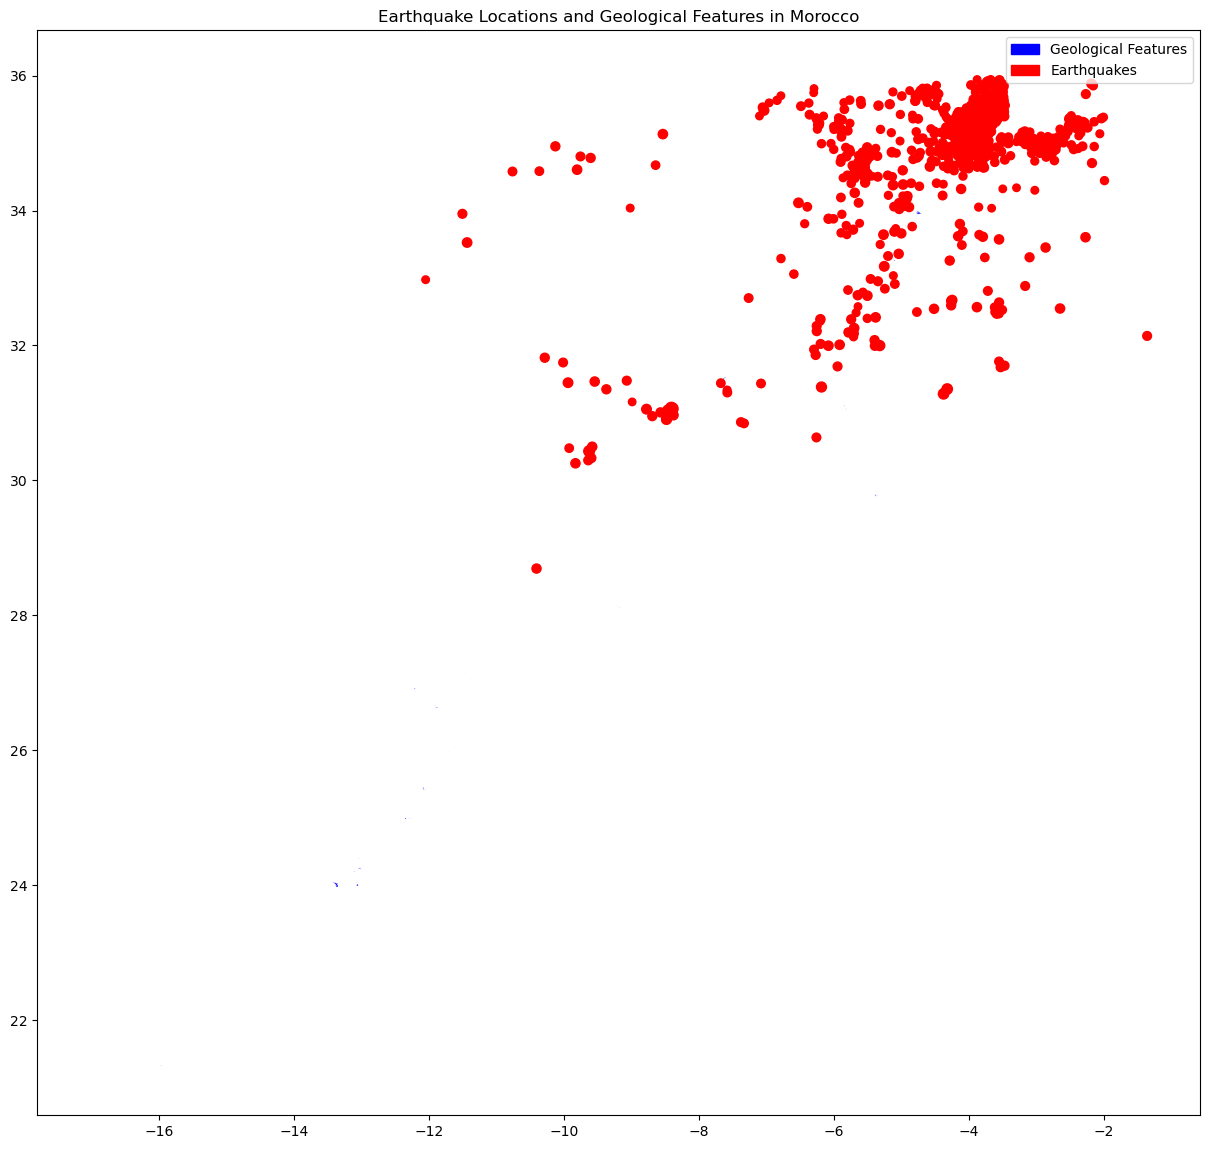

In [63]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from matplotlib.patches import Patch

class HandlerPatchCollection(HandlerPathCollection):
    def create_artists(self, legend, orig_handle, xdescent, ydescent,
                       width, height, fontsize, trans):
        # In this case, we just create a rectangle with the color of the original PatchCollection
        p = Patch([0, 0], width, height, facecolor=orig_handle.get_facecolor()[0])
        return [p]
fig, ax = plt.subplots(figsize=(15, 15))

# Plotting the geological features
geo_plot = natural_features_gdf[natural_features_gdf['fclass'].isin(['cliff', 'peak', 'ridge', 'volcano'])].plot(ax=ax, color='blue', markersize=10)

# Plotting the earthquakes
earthquake_plot = gdf_earthquakes.plot(ax=ax, color='red', markersize=gdf_earthquakes['Magnitude']*10)

# Create custom legend
legend_handles = [Patch(facecolor='blue', edgecolor='blue', label='Geological Features'),
                  Patch(facecolor='red', edgecolor='red', label='Earthquakes')]
ax.legend(handles=legend_handles, handler_map={type(geo_plot): HandlerPatchCollection()})

# Title
ax.set_title('Earthquake Locations and Geological Features in Morocco')

plt.show()


## Analyze the distribution of earthquake magnitudes in relation to their proximity to geological features

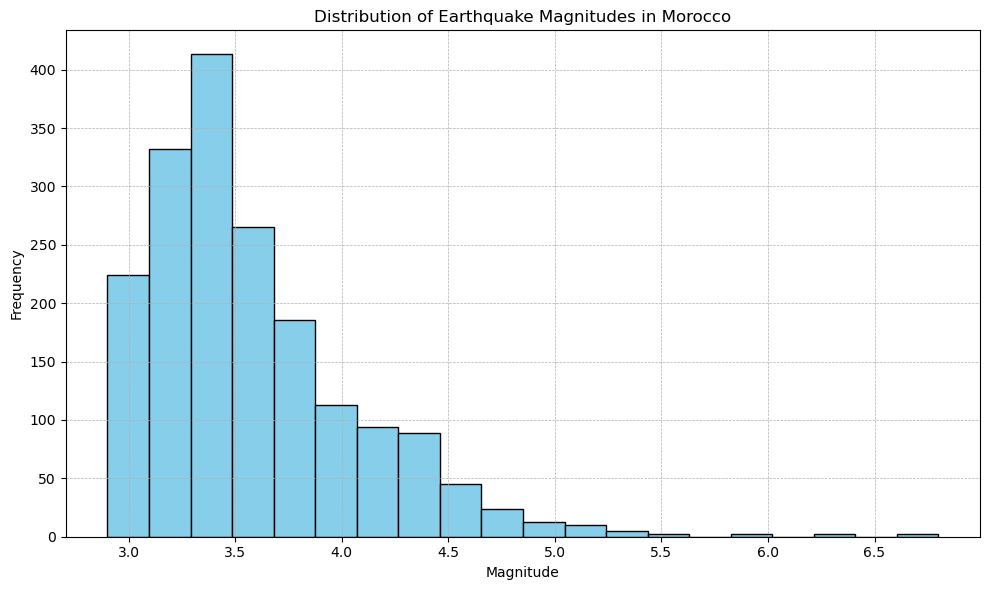

In [62]:
# Plotting histogram for earthquake magnitudes
plt.figure(figsize=(10,6))
plt.hist(gdf_earthquakes['Magnitude'], bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Earthquake Magnitudes in Morocco')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


The majority of the earthquakes have magnitudes between 3.5 and 4.5.

There are fewer events with higher magnitudes, as expected since major earthquakes are relatively rare.

#### Create a scatter plot to visualize earthquake magnitudes against their distance to the nearest geological feature. This will help us understand if there's any relationship between the proximity to geological features and the magnitude of the earthquakes.

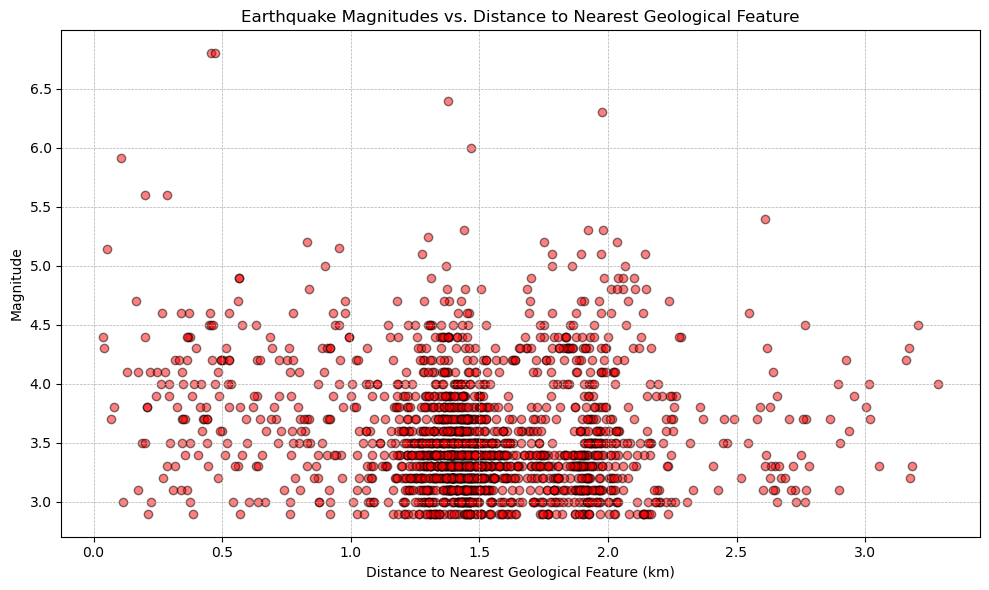

In [64]:
# Scatter plot of earthquake magnitudes against distance to nearest geological feature
plt.figure(figsize=(10,6))
plt.scatter(gdf_earthquakes['distance_to_feature'], gdf_earthquakes['Magnitude'], alpha=0.5, edgecolor='black', color='red')
plt.title('Earthquake Magnitudes vs. Distance to Nearest Geological Feature')
plt.xlabel('Distance to Nearest Geological Feature (km)')
plt.ylabel('Magnitude')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

There isn't a clear trend suggesting that earthquakes of higher magnitude occur closer to geological features. The data points are quite spread out.

However, most of the earthquakes, irrespective of their magnitude, occur within 2 km of a geological feature.

#### For a more comprehensive understanding, let's compute some statistical measures:

Mean magnitude of earthquakes occurring within 1 km of a geological feature.

Mean magnitude of earthquakes occurring beyond 1 km from a geological feature.

Overall mean magnitude of all earthquakes.

In [65]:
# Calculate statistical measures
close_earthquakes = gdf_earthquakes[gdf_earthquakes['distance_to_feature'] <= 1]
far_earthquakes = gdf_earthquakes[gdf_earthquakes['distance_to_feature'] > 1]

mean_magnitude_close = close_earthquakes['Magnitude'].mean()
mean_magnitude_far = far_earthquakes['Magnitude'].mean()
overall_mean_magnitude = gdf_earthquakes['Magnitude'].mean()

mean_magnitude_close, mean_magnitude_far, overall_mean_magnitude

(3.888082901554404, 3.506842751842752, 3.5472487644151567)

From these statistics:

Earthquakes closer to geological features (within 1 km) have a slightly higher mean magnitude (≈3.89) compared to those farther away.

However, the difference in means isn't drastic.

## Key Insights:

Earthquakes closer to geological features (within 1 km) had a slightly higher mean magnitude (approx 3.89) compared to those farther away.
The difference in means wasn't drastic, suggesting that while there might be some correlation between proximity to geological features and earthquake magnitude, other factors likely play a significant role as well.

## Discussion

Earthquake Magnitude and Proximity to Geological Features: The study unveiled a nuanced relationship between earthquake magnitudes and their proximity to geological features, such as cliffs. Earthquakes closer to these features exhibited a slightly higher average magnitude. This insight underscores the importance of understanding the geology of an area when assessing earthquake risks.

Venue Popularity and Earthquake Occurrence: The clustering of cities based on venues and earthquake data was an innovative approach that revealed patterns in the popularity of certain venues in cities with higher earthquake occurrences. While it's uncertain if earthquakes directly influence venue popularity, the results provide a unique perspective on urban behaviors and preferences in earthquake-prone regions.

Regional Variations: The analysis also highlighted regional variations in earthquake occurrences and magnitudes. Cities closer to certain geological features or fault lines might inherently carry a higher risk, which can influence urban planning, infrastructure development, and emergency preparedness measures.

Data Limitations and Opportunities: While the Foursquare API provided valuable insights into venue preferences, the integration of more comprehensive and diverse datasets can further refine the analysis. For instance, integrating socio-economic data, urban density metrics, and detailed geological studies could provide a more holistic view of the factors influencing earthquake risks and urban preferences.

The Need for Preparedness: The data underscores the importance of preparedness in cities with a history of significant seismic activity. Urban planners, architects, and city administrators can use such insights to develop more resilient infrastructures, enforce stricter building codes, and design more effective evacuation plans.



By integrating geospatial data, earthquake records, and venue preferences, this study offers a multi-dimensional view of Moroccan cities. It underscores the interconnectedness of geological risks, urban behaviors, and social preferences, paving the way for more informed decision-making for both businesses and policymakers.

__Hafida Belayd__<br>
Data & Computer Science Enthusiast.